# **Menetapkan Tujuan Analisis**

Analisis bertujuan untuk menilai **efektivitas program loyalitas** dalam **meningkatkan penjualan per periode** dan **mempertahankan pelanggan setia**. Hal ini penting karena akan berdampak langsung pada profitabilitas toko dan daya saingnya. Pemangku kepentingan utama yang akan tertarik dengan hasil analisis ini termasuk manajemen toko, pemilik, dan tim pemasaran, yang akan menggunakan hasilnya untuk membuat keputusan strategis, seperti perbaikan program loyalitas, penyesuaian biaya keanggotaan, dan pengoptimalan manfaat yang ditawarkan kepada anggota program.

# **Latar Belakang**

Toko retail **Home World** adalah pengecer bahan bangunan yang mengoperasikan program loyalitas bagi para pelanggannya. Program ini menawarkan sejumlah manfaat, seperti **pemberian diskon**, **informasi tentang penawaran spesial**, dan **sejumlah hadiah** kepada para anggota program dengan **biaya keanggotaan bulanan sebesar $20**. Penelitian ini bertujuan untuk melakukan analisis secara menyeluruh terhadap program loyalitas ini untuk memahami sejauh mana program tersebut efektif dalam **meningkatkan penjualan dan mempertahankan retensi pelanggan**


# **Tujuan Analisis**

1. Mengidentifikasi apakah terdapat perbedaan antara pelanggan yang merupakan anggota program loyalitas dan yang bukan, dalam hal **pola pembelian**, **preferensi produk**, dan **retensi pelanggan**
2. Menilai efektivitas program loyalitas dalam **meningkatkan retensi pengguna**

# **Sumber Referensi**

Dalam konteks analisis program loyalitas toko "Home World," faktor-faktor yang mempengaruhi loyalitas pelanggan dapat berperan penting dalam memahami efektivitas program loyalitas tersebut. Berikut beberapa referensi mengenai faktor-faktor yang mempengaruhi loyalitas pelanggan dan hubungannya dengan kasus ini:

1. **Kualitas Layanan**: Penelitian seperti yang dijelaskan dalam studi oleh Parasuraman, Zeithaml, dan Berry (1988) mengindikasikan bahwa kualitas layanan berperan penting dalam membentuk loyalitas pelanggan. Dalam kasus "Home World," kualitas layanan yang diberikan kepada anggota program loyalitas dan non-anggota dapat memengaruhi persepsi pelanggan terhadap toko dan program loyalitasnya.

2. **Manfaat Program Loyalitas**: Sebuah penelitian oleh Sweeney dan Soutar (2001) menyoroti pentingnya persepsi pelanggan terhadap manfaat yang mereka terima dari program loyalitas. Hubungan antara manfaat yang ditawarkan oleh program loyalitas "Home World" dan tingkat kepuasan serta loyalitas pelanggan dapat dieksplorasi dalam analisis.

3. **Keterlibatan Pelanggan**: Menurut Oliver (1999), tingkat keterlibatan pelanggan dengan merek atau program loyalitas dapat memengaruhi tingkat loyalitas. Analisis dapat melihat apakah anggota program loyalitas "Home World" lebih terlibat daripada non-anggota dan apakah tingkat keterlibatan ini berdampak pada retensi pelanggan.

4. **Penawaran Produk dan Promosi**: Penelitian oleh Chaudhuri dan Holbrook (2001) menyoroti pentingnya penawaran produk dan promosi yang sesuai dengan preferensi pelanggan. Dalam kasus ini, identifikasi preferensi produk anggota program loyalitas dan penyesuaian penawaran produk dapat berpotensi meningkatkan efektivitas program.

5. **Hubungan Pelanggan**: Menurut Reichheld (1996), hubungan yang kuat antara pelanggan dan merek atau toko dapat menghasilkan tingkat loyalitas yang tinggi. Analisis retensi pelanggan dalam cohort anggota program loyalitas dapat mengungkapkan apakah hubungan ini terbentuk dalam kasus "Home World."

In [1]:
pip install xlrd

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Memuat Data**

Bagian ini menekankan pada aspek pemahaman awal terhadap data yang berkaitan dengan :
* Mengimpor library yang diperlukan dalam analisis
* Mengimpor dataset dari file CSV: retail_dataset_us.csv dan product_codes_us.csv
* Memahami struktur data, fitur-fitur pada data, jenis data untuk masing-masing kolom, dan informasi umum (statistik deskriptif) yang terkandung pada data
* Memeriksa integritas data terkait dengan potensi masalah yang umum seperti nilai yang hilang (missing values), outlier, duplikat data, dan nilai-nilai yang janggal
* Pengembangan dataset dengan menerapkan penambahan sejumlah fitur yang relevan dengan analisis

Pemahaman awal data ini akan membantu memastikan bahwa data yang digunakan dalam analisis program loyalitas toko retail "Home World" adalah bersih, relevan, dan siap untuk langkah-langkah analisis selanjutnya.

In [4]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import joblib
import random
import statistics
import math
from scipy.stats import mannwhitneyu
from prettytable import PrettyTable

## **Dataset : Retail**

In [5]:
# Memuat Dataset retail_dataset_us

df_retail = pd.read_excel(r'/content/gdrive/My Drive/Portfolio Data Analyst - Ryan Hasianda Pasaribu/Practicum/Menganalisis Progam Loyalitas/FINAL PROJECT : ANALISIS EFEKTIFITAS PROGRAM LOYALITAS/Salinan retail_dataset_us.xlsx')
df_retail

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
...,...,...,...,...,...,...,...
105330,538566,21826,1,2016-12-13 11:21:00,NaN,0,Shop 0
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29


In [6]:
# Identifikasi jumlah baris dan kolom

df_retail.shape

(105335, 7)

**Kesimpulan :**

Dataset retail_dataset_us memuat sebanyak **7 kolom** dengan **105.335 baris data**

In [7]:
# Mengganti nama kolom menjadi huruf kecil

df_retail.columns = df_retail.columns.str.lower()
df_retail.columns

Index(['purchaseid', 'item_id', 'quantity', 'purchasedate', 'customerid',
       'loyalty_program', 'shopid'],
      dtype='object')

In [8]:
# mempelajari informasi umum

df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchasedate     105335 non-null  datetime64[ns]
 4   customerid       69125 non-null   float64       
 5   loyalty_program  105335 non-null  int64         
 6   shopid           105335 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB


In [9]:
# Menghitung jumlah nilai null untuk setiap kolom
jumlah_null = df_retail.isnull().sum()
persentase_null = (jumlah_null / len(df_retail)) * 100
summary_null = pd.DataFrame({'Jumlah Null': jumlah_null, 'Persentase Null (%)': persentase_null})
summary_null['Persentase Null (%)'] = summary_null['Persentase Null (%)'].round(1)

# Menampilkan summary null
summary_null

,Jumlah Null,Persentase Null (%)
purchaseid,0,0.0
item_id,0,0.0
quantity,0,0.0
purchasedate,0,0.0
customerid,36210,34.4
loyalty_program,0,0.0
shopid,0,0.0


**Kesimpulan :**

Terdapat 34.4% baris null pada kolom **customer id** (36.210 baris data)

## **Dataset : Product**

In [10]:
# Memuat Dataset product_codes_us

df_product = pd.read_excel(r'/content/gdrive/My Drive/Portfolio Data Analyst - Ryan Hasianda Pasaribu/Practicum/Menganalisis Progam Loyalitas/FINAL PROJECT : ANALISIS EFEKTIFITAS PROGRAM LOYALITAS/Salinan product_codes_us.xlsx')
df_product

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42
...,...,...
3154,gift_0001_20,16.67
3155,gift_0001_30,25.00
3156,gift_0001_40,34.04
3157,gift_0001_50,42.55


In [11]:
# Identifikasi jumlah baris dan kolom

df_product.shape

(3159, 2)

**Kesimpulan :**

Dataset product_codes_us memuat sebanyak **2 kolom** dengan **3.159 baris data**

In [12]:
# Mengganti nama kolom menjadi huruf kecil

df_product.columns = df_product.columns.str.lower()
df_product.columns

Index(['productid', 'price_per_one'], dtype='object')

In [13]:
# mempelajari informasi umum

df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productid      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


**Kesimpulan :**

**Tidak terdapat baris null** dari seluruh kolom dataset product

## **Penggabungan Dataset**

In [14]:
# Menggabungkan kedua dataset

df_joined = pd.merge(df_retail, df_product, left_on="item_id", right_on="productid", how="inner")
df_joined

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,21873,0.42
1,541104,21873,0,2017-01-13 14:29:00,NaN,0,Shop 0,21873,0.42
2,540418,21873,1,2017-01-07 11:04:00,NaN,0,Shop 0,21873,0.42
3,541516,21873,2,2017-01-18 17:34:00,NaN,0,Shop 0,21873,0.42
4,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,21873,0.42
...,...,...,...,...,...,...,...,...,...
105330,538852,90058B,35,2016-12-14 13:33:00,23051.0,1,Shop 8,90058B,0.38
105331,539988,46138B,1,2016-12-23 16:06:00,23795.0,1,Shop 14,46138B,1.95
105332,537025,90053,0,2016-12-03 16:21:00,NaN,0,Shop 0,90053,2.55
105333,542731,17028J,5,2017-01-31 15:27:00,19279.0,0,Shop 0,17028J,0.42


**Kesimpulan :**

Penggabungan **Dataset Retail** dan **Dataset Product** menghasilkan baris data sebanyak **105.335 baris data**

In [15]:
# mempelajari informasi umum

df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105335 entries, 0 to 105334
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchasedate     105335 non-null  datetime64[ns]
 4   customerid       69125 non-null   float64       
 5   loyalty_program  105335 non-null  int64         
 6   shopid           105335 non-null  object        
 7   productid        105335 non-null  object        
 8   price_per_one    105335 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 8.0+ MB


In [16]:
# Menghitung jumlah nilai null untuk setiap kolom
jumlah_null = df_joined.isnull().sum()
persentase_null = (jumlah_null / len(df_joined)) * 100
summary_null = pd.DataFrame({'Jumlah Null': jumlah_null, 'Persentase Null (%)': persentase_null})
summary_null['Persentase Null (%)'] = summary_null['Persentase Null (%)'].round(1)

# Menampilkan summary null
summary_null

,Jumlah Null,Persentase Null (%)
purchaseid,0,0.0
item_id,0,0.0
quantity,0,0.0
purchasedate,0,0.0
customerid,36210,34.4
loyalty_program,0,0.0
shopid,0,0.0
productid,0,0.0
price_per_one,0,0.0


**Kesimpulan :**

Jumlah **Customer ID** yang null sebesar **34.4%** atau **36.210 baris data**

## **Prapemrosesan Data**

In [17]:
# Mengambil statistik deskriptif hanya untuk kolom dengan tipe data objek (string)

df_joined.describe(include=['object']).T

,count,unique,top,freq
purchaseid,105335,4894,537434,675
item_id,105335,3159,85123A,565
shopid,105335,31,Shop 0,38389
productid,105335,3159,85123A,565


In [18]:
# Mengambil statistik deskriptif hanya untuk kolom bertipe numerik

df_joined.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,105335.0,7.821218,327.946695,-74216.0,0.00,2.00,7.00,74214.0
customerid,69125.0,21019.302047,1765.444679,18025.0,19544.00,20990.00,22659.00,23962.0
loyalty_program,105335.0,0.226345,0.418467,0.0,0.00,0.00,0.00,1.0
price_per_one,105335.0,2.064529,3.713163,0.0,0.42,1.25,2.55,175.0


**Kesimpulan :**

* Terdapat total **4.894 transaksi** unik yang tercatat di database
* Ada sebanyak **3.159 varian produk** berbeda yang tersedia di platform penjulan perusahaan
* Terdapat **31 toko** yang berpartisipasi di dalam platform penjualan daring
* Rata-rata jumlah barang yang dibeli per transaksi adalah **8 barang**, dengan jumlah barang tertinggi mencapai **74.214 barang dalam satu kali transaksi**. Meskipun demikian, **25% dari transaksi menunjukkan bahwa tidak ada barang yang dibeli**. Kami juga memperhatikan adanya **nilai negatif yang tampaknya tidak wajar**
* Terlihat bahwa mayoritas pelanggan **tidak tergabung sebagai anggota program loyalitas** (>50% dari pelanggan)
* Rata-rata harga untuk setiap produk yang ditransaksikan adalah sekitar **2.06 dolar**, dengan harga tertinggi mencapai **175 dolar** untuk beberapa produk, sementara beberapa produk lainnya ternyata merupakan *free item*

### **Identifikasi Duplikat**

In [19]:
# Menghitung jumlah duplikat pada data
jumlah_duplikat = df_joined.duplicated().sum()

# Menghitung jumlah total baris dalam dataframe
jumlah_total = len(df_joined)

# Menghitung persentase duplikat
persentase_duplikat = (jumlah_duplikat / jumlah_total) * 100

print('Jumlah Baris Duplikat :', jumlah_duplikat)
print('Persentase duplikat dalam dataset: {:.2f}%'.format(persentase_duplikat))

# Logika if-else untuk menampilkan pesan berbeda berdasarkan persentase duplikat
if persentase_duplikat == 0:
    print('Tidak ada duplikat dalam dataset')
elif persentase_duplikat < 10:
    print('Duplikat dalam dataset rendah')
else:
    print('Duplikat dalam dataset tinggi')


Jumlah Baris Duplikat : 1033
Persentase duplikat dalam dataset: 0.98%
Duplikat dalam dataset rendah


In [20]:
# Mengidentifikasi baris yang duplikat
duplikat = df_joined[df_joined.duplicated(keep=False)]

# Menampilkan baris-baris yang duplikat
print("Baris yang Duplikat:")
duplikat

Baris yang Duplikat:


,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one
61,543165,22195,0,2017-02-03 19:58:00,18909.0,0,Shop 2,22195,1.65
69,543165,22195,0,2017-02-03 19:58:00,18909.0,0,Shop 2,22195,1.65
72,538368,22195,0,2016-12-12 10:57:00,21182.0,0,Shop 15,22195,1.65
77,538368,22195,0,2016-12-12 10:57:00,21182.0,0,Shop 15,22195,1.65
221,539750,21239,1,2016-12-21 15:40:00,NaN,0,Shop 0,21239,0.72
...,...,...,...,...,...,...,...,...,...
104707,537208,90082D,0,2016-12-05 15:12:00,21568.0,0,Shop 8,90082D,6.35
104720,544463,90065A,1,2017-02-20 14:31:00,18667.0,0,Shop 9,90065A,6.75
104721,544463,90065A,1,2017-02-20 14:31:00,18667.0,0,Shop 9,90065A,6.75
104780,537351,21226,0,2016-12-06 12:23:00,22577.0,1,Shop 18,21226,1.25


**Kesimpulan :**

Teridentifikasi sebanyak **1.033 baris data** (< 1%) yang duplikat.Kami memutuskan untuk **menghapus baris data yang duplikat** dikarenakan persentasenya **tidak terlalu signfikan** terhadap keseluruhan jumlah total data

In [21]:
# Menghapus baris yang duplikat dari dataframe

df_joined = df_joined.drop_duplicates()
df_joined

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,21873,0.42
1,541104,21873,0,2017-01-13 14:29:00,NaN,0,Shop 0,21873,0.42
2,540418,21873,1,2017-01-07 11:04:00,NaN,0,Shop 0,21873,0.42
3,541516,21873,2,2017-01-18 17:34:00,NaN,0,Shop 0,21873,0.42
4,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,21873,0.42
...,...,...,...,...,...,...,...,...,...
105330,538852,90058B,35,2016-12-14 13:33:00,23051.0,1,Shop 8,90058B,0.38
105331,539988,46138B,1,2016-12-23 16:06:00,23795.0,1,Shop 14,46138B,1.95
105332,537025,90053,0,2016-12-03 16:21:00,NaN,0,Shop 0,90053,2.55
105333,542731,17028J,5,2017-01-31 15:27:00,19279.0,0,Shop 0,17028J,0.42


### **Penyesuaian Data Untuk Sejumlah Fitur**

#### **Item ID**

In [22]:
# Menampilkan total item_id yang unik
unique_item_ids = df_joined['item_id'].nunique()
print(f"Varian Jumlah Item Yang Tersedia Di Platform : {unique_item_ids}", 'Item Berbeda')

Varian Jumlah Item Yang Tersedia Di Platform : 3159 Item Berbeda


In [23]:
# Menghitung panjang (length) dari item_id dan menyimpannya dalam kolom baru 'item_id_length'
df_joined['item_id_length'] = df_joined['item_id'].astype(str).apply(len)

# Menghitung jumlah kemunculan setiap panjang item_id
item_id_length_counts = df_joined['item_id_length'].value_counts().reset_index()

# Mengganti nama kolom agar lebih deskriptif
item_id_length_counts.columns = ['Varian Jumlah Komponen Baris Item_id', 'Jumlah Kemunculan']
item_id_length_counts

<ipython-input-23-d6d2498c807a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_joined['item_id_length'] = df_joined['item_id'].astype(str).apply(len)


,Varian Jumlah Komponen Baris Item_id,Jumlah Kemunculan
0,5,90345
1,6,13307
2,4,217
3,3,175
4,1,103
5,7,93
6,2,20
7,12,17
8,8,13
9,9,12


In [24]:
unique_codes = df_joined[df_joined['item_id_length'] == 12]['item_id'].unique()
unique_codes

array(['BANK CHARGES', 'gift_0001_20', 'gift_0001_30', 'gift_0001_40',
       'gift_0001_50'], dtype=object)

**Kesimpulan :**

Meskipun sebagian besar kode item (item_id) yang kami identifikasi merupakan kode standar untuk transaksi penjualan perusahaan, namun, terdapat sejumlah kode yang memiliki keterangan yang tidak kami pahami sepenuhnya. Untuk lebih memahami makna atau detail yang terkait dengan setiap kode ini, perlu kami konfirmasikan melalui catatan internal perusahaan atau basis data produk. Sebagai contoh:
1. Beberapa kode 'item_id' memiliki komponen yang sama, tetapi berbeda dalam penggunaan huruf kapital dan huruf kecil (contohnya: '15056BL' & '15056bl').
2. Kode "AMAZONFEE" kemungkinan adalah biaya tambahan yang dikenakan kepada pelanggan untuk produk yang dibeli melalui platform.
3. Kode "BANK CHARGES" mungkin merujuk kepada biaya yang terkait dengan transaksi perbankan.
4. Kode seperti "gift_0001_20", "gift_0001_30", "gift_0001_40", dan "gift_0001_50" sepertinya mengacu pada item-item yang terkait dengan hadiah atau barang tertentu.
5. Selain itu, terdapat juga kode 'item_id' yang hanya memiliki kurang dari 2 komponen.

**Kami akan melakukan konfirmasi lebih lanjut terkait makna atau penggunaan kode-kode ini untuk memastikan pemahaman yang lebih baik**

In [25]:
# Mengidentifikasi item_id yang seluruh aktifitas transaksinya memiliki quantity 0 atau negatif
unique_zero_or_negative_quantity_items = []

# Mengelompokkan data berdasarkan item_id
grouped = df_joined.groupby('item_id')

for item_id, group in grouped:
    if all(group['quantity'] <= 0):  # Menggunakan <= untuk memeriksa quantity yang negatif juga
        unique_zero_or_negative_quantity_items.append(item_id)

# Mencetak jumlah nilai unik dalam daftar
print("Jumlah produk item dengan jumlah barang per transaksi yang hanya bernilai 0 atau negatif adalah sebanyak:", len(unique_zero_or_negative_quantity_items))
print()

# Mencetak daftar item_id uniknya
print("Berikut daftar item_id uniknya:")
print(unique_zero_or_negative_quantity_items)

Jumlah produk item dengan jumlah barang per transaksi yang hanya bernilai 0 atau negatif adalah sebanyak: 383

Berikut daftar item_id uniknya:
[17174, 20661, 20666, 20670, 20695, 20697, 20700, 20701, 20703, 20738, 20766, 20785, 20835, 20840, 20845, 20849, 20860, 20861, 20864, 20906, 20950, 20954, 20957, 21009, 21117, 21120, 21129, 21134, 21160, 21226, 21228, 21263, 21264, 21265, 21277, 21282, 21336, 21344, 21360, 21367, 21368, 21369, 21372, 21410, 21412, 21414, 21420, 21431, 21473, 21476, 21491, 21589, 21594, 21595, 21634, 21645, 21653, 21661, 21681, 21761, 21805, 21841, 21895, 22125, 22143, 22146, 22206, 22323, 22340, 22528, 22596, 22824, 35443, 35644, 35832, 35933, 35969, 35991, 37468, 37474, 37476, 37503, 47579, 71215, 79320, 84227, 84388, 84455, 84461, 84466, 84522, 84526, 84546, 84616, 84617, 84632, 84664, 84687, 84723, 84725, 84840, 84847, 84921, 85042, 85044, 85063, 85065, 85068, 85110, 85119, 90022, 90028, 90029, 90031, 90033, 90034, 90041, 90050, 90051, 90053, 90054, 90055, 90

In [26]:
# identifikasi baris & kolom untuk item_id dengan kode 37476 (salah satu item dengan seluruh transaksinya memiliki kuantitas nol atau negatif)

df_joined[df_joined['item_id'] == 37476].sort_values(by='quantity', ascending=True)

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length
86258,537029,37476,-7,2016-12-03 16:37:00,NaN,0,Shop 0,37476,0.0,5
86254,540247,37476,0,2017-01-05 15:56:00,21143.0,0,Shop 24,37476,0.0,5
86255,536544,37476,0,2016-12-01 14:32:00,NaN,0,Shop 0,37476,0.0,5
86256,537240,37476,0,2016-12-06 10:08:00,NaN,0,Shop 0,37476,0.0,5
86257,541127,37476,0,2017-01-14 10:11:00,NaN,0,Shop 0,37476,0.0,5
86259,538153,37476,0,2016-12-09 16:31:00,NaN,0,Shop 0,37476,0.0,5


**Selain itu, kami juga menemukan bahwa terdapat 383 item (sekitar 12.1% dari seluruh item yang ada) yang memiliki transaksi dengan total kuantitas (quantity) per transaksi seluruhnya adalah 0 dan atau negatif. Untuk itu kami akan menghapus baris data dengan kondisi tersebut**

In [27]:
# menghapus seluruh baris dimana item produk memiliki transaksi dengan total kuantitas per transaksi seluruhnya adalah 0 dan atau negatif (383 item unik)

# Memfilter dataset df_joined hanya untuk seluruh item_id yang ada dalam list unique_zero_quantity_items
filtered_df = df_joined[df_joined['item_id'].isin(unique_zero_or_negative_quantity_items)]

# Menghitung jumlah baris dalam filtered_df
jumlah_baris_filtered = len(filtered_df)

# Menghitung jumlah baris dalam dataset asli (df_joined)
jumlah_baris_asli = len(df_joined)

# Menghitung persentase terhadap seluruh baris dataset
persentase_terhadap_seluruh_dataset = (jumlah_baris_filtered / jumlah_baris_asli) * 100

# Mencetak persentase
print(f"Persentase Baris Yang Hendak Dihapus Terhadap Seluruh Baris Dataset: {persentase_terhadap_seluruh_dataset:.2f}%")
print()
print()
filtered_df.sort_values(by='quantity', ascending=False)

Persentase Baris Yang Hendak Dihapus Terhadap Seluruh Baris Dataset: 1.00%




,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length
5327,545216,90133,0,2017-02-28 16:50:00,NaN,0,Shop 0,90133,4.95,5
103824,537638,46776E,0,2016-12-07 15:28:00,NaN,0,Shop 0,46776E,4.21,6
103826,540681,46776E,0,2017-01-10 16:25:00,NaN,0,Shop 0,46776E,4.21,6
103833,543777,90029,0,2017-02-11 16:20:00,21085.0,0,Shop 29,90029,8.50,5
103855,545217,20700,0,2017-02-28 16:59:00,NaN,0,Shop 0,20700,3.75,5
...,...,...,...,...,...,...,...,...,...,...
105297,540683,84546,-46,2017-01-10 17:00:00,NaN,0,Shop 0,84546,0.00,5
99576,540987,17011A,-62,2017-01-12 16:15:00,NaN,0,Shop 0,17011A,0.00,6
104727,543259,84612B,-163,2017-02-04 16:07:00,NaN,0,Shop 0,84612B,0.00,6
105006,543261,84613C,-174,2017-02-04 16:08:00,NaN,0,Shop 0,84613C,0.00,6


**Kesimpulan :**

Jumlah baris dimana item produk memiliki total kuantitas (quantity) per transaksi seluruhnya adalah nol atau negatif **hanya sekitar 1% dari seluruh data**. Dengan mempertimbangkan signifikansi hasil analisis data, kami memutuskan untuk menghapus item-item tersebut

In [28]:
# Memperbaharui dataset hanya untuk seluruh item_id yang tidak ada dalam list unique_zero_quantity_items

df_joined = df_joined[~df_joined['item_id'].isin(unique_zero_or_negative_quantity_items)]
df_joined

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,21873,0.42,5
1,541104,21873,0,2017-01-13 14:29:00,NaN,0,Shop 0,21873,0.42,5
2,540418,21873,1,2017-01-07 11:04:00,NaN,0,Shop 0,21873,0.42,5
3,541516,21873,2,2017-01-18 17:34:00,NaN,0,Shop 0,21873,0.42,5
4,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,21873,0.42,5
...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795.0,1,Shop 14,16206B,1.25,6
105327,539009,79329,5,2016-12-15 13:24:00,18900.0,0,Shop 28,79329,1.65,5
105330,538852,90058B,35,2016-12-14 13:33:00,23051.0,1,Shop 8,90058B,0.38,6
105331,539988,46138B,1,2016-12-23 16:06:00,23795.0,1,Shop 14,46138B,1.95,6


**Kesimpulan :**

Jumlah baris data **setelah menghilangkan baris data dimana item produk memiliki kuantitas (quantity) per transaksi yang seluruhnya nol atau negatif** adalah sebanyak **103.255 baris data**

#### **Customer ID**

In [29]:
# Membuat tabel untuk jumlah pelanggan yang unik
total_unique_cust_bfr = df_joined['customerid'].nunique()
table1 = PrettyTable()
table1.field_names = ["Deskripsi", "Jumlah"]
table1.add_row(["Jumlah Total Pengguna", total_unique_cust_bfr])

# Membuat tabel untuk jumlah total purchaseid yang unik
total_unique_transactions = df_joined['purchaseid'].nunique()
table2 = PrettyTable()
table2.field_names = ["Deskripsi", "Jumlah"]
table2.add_row(["Jumlah Total Transaksi (unik)", total_unique_transactions])

# Menghitung jumlah total transaksi untuk customer id yang null
total_transactions_null_customer_id = df_joined[df_joined['customerid'].isnull()]['purchaseid'].nunique()

# Membuat tabel untuk transaksi dengan customer id yang null
if total_unique_transactions > 0:
    percentage_null_customer_id = (total_transactions_null_customer_id / total_unique_transactions) * 100
    table3 = PrettyTable()
    table3.field_names = ["Deskripsi", "Jumlah"]
    table3.add_row(["Jumlah Total Transaksi (Unik, Customer Id Yang Null)", total_transactions_null_customer_id])
    table3.add_row(["Persentase Transaksi (Customer Id Null) Terhadap Seluruh Total Transaksi",
                    "{:.2f}%".format(percentage_null_customer_id)])
else:
    table3 = PrettyTable()
    table3.field_names = ["Deskripsi", "Jumlah"]
    table3.add_row(["Deskripsi", "Tidak terdapat transaksi dengan customer id yang null"])

# Mencetak tabel
print("Tabel 1: Jumlah Pelanggan yang Unik")
print(table1)

print("\nTabel 2: Jumlah Total Transaksi yang Unik")
print(table2)

print("\nTabel 3: Transaksi dengan Customer Id yang Null")
print(table3)

Tabel 1: Jumlah Pelanggan yang Unik
+-----------------------+--------+
|       Deskripsi       | Jumlah |
+-----------------------+--------+
| Jumlah Total Pengguna |  1747  |
+-----------------------+--------+

Tabel 2: Jumlah Total Transaksi yang Unik
+-------------------------------+--------+
|           Deskripsi           | Jumlah |
+-------------------------------+--------+
| Jumlah Total Transaksi (unik) |  4774  |
+-------------------------------+--------+

Tabel 3: Transaksi dengan Customer Id yang Null
+--------------------------------------------------------------------------+--------+
|                                Deskripsi                                 | Jumlah |
+--------------------------------------------------------------------------+--------+
|           Jumlah Total Transaksi (Unik, Customer Id Yang Null)           |  652   |
| Persentase Transaksi (Customer Id Null) Terhadap Seluruh Total Transaksi | 13.66% |
+---------------------------------------------------

**Kesimpulan :**

Total transaksi tercatat sebanyak **4.774 transaksi** dari sekitar **1.747 pengguna**, dimana **13.7% transaksi** tersebut dimiliki oleh **pelanggan yang tidak teridentifikasi**

In [30]:
# identifikasi baris data dimana customer id null

df_joined[df_joined['customerid'].isnull()]

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length
1,541104,21873,0,2017-01-13 14:29:00,NaN,0,Shop 0,21873,0.42,5
2,540418,21873,1,2017-01-07 11:04:00,NaN,0,Shop 0,21873,0.42,5
3,541516,21873,2,2017-01-18 17:34:00,NaN,0,Shop 0,21873,0.42,5
12,540352,21873,0,2017-01-06 14:27:00,NaN,0,Shop 0,21873,0.42,5
13,539958,21873,0,2016-12-23 13:26:00,NaN,0,Shop 0,21873,0.42,5
...,...,...,...,...,...,...,...,...,...,...
105275,539958,90013D,2,2016-12-23 13:26:00,NaN,0,Shop 0,90013D,4.24,6
105276,537237,90199A,0,2016-12-06 09:58:00,NaN,0,Shop 0,90199A,6.35,6
105300,543000,84509b,1,2017-02-02 12:17:00,NaN,0,Shop 0,84509b,7.46,6
105306,543899,84798B,3,2017-02-14 12:11:00,NaN,0,Shop 6,84798B,2.55,6


* Jumlah baris dengan Customer Id yang null adalah sebanyak **35.358** atau dengan persentase sebesar **34.2% terhadap seluruh baris data**

* Kami akan mengisi kolom "Customer ID" yang belum memiliki nilai dengan angka acak yang belum pernah digunakan sebelumnya didalam dataset

In [31]:
df_joined_bfr = df_joined.copy()

# identifikasi top 10 pelanggan dengan jumlah transaksi tinggi

unique_purchase_ids = df_joined_bfr.groupby('customerid')['purchaseid'].nunique().reset_index()
sorted_unique_purchase_ids = unique_purchase_ids.sort_values(by='purchaseid', ascending=False)
sorted_unique_purchase_ids.head(10)

,customerid,purchaseid
141,18427.0,46
688,20285.0,38
1616,23529.0,35
883,20990.0,33
1612,23520.0,30
242,18768.0,29
778,20590.0,28
812,20740.0,21
205,18650.0,19
433,19456.0,17


In [32]:
# Fungsi untuk mengisi baris null pada kolom customerid

def cust_id_fill(df, random_seed=42):
    # Set random seed untuk hasil yang konsisten
    random.seed(random_seed)

    # Mendapatkan nilai maksimum pada kolom customerid
    max_customer_id = df['customerid'].max()

    # Menginisialisasi set untuk melacak customerid yang telah digunakan
    used_customer_ids = set()

    # Loop pada setiap nilai unik dari kolom "purchaseid"
    for purch in df['purchaseid'].unique():
        # Memilih satu nilai acak yang lebih besar dari max_customer_id
        random_customer_id = random.randint(max_customer_id + 1, 2 * max_customer_id)

        # Memastikan bahwa nilai acak yang dipilih belum digunakan sebelumnya
        while random_customer_id in used_customer_ids:
            random_customer_id = random.randint(max_customer_id + 1, 2 * max_customer_id)

        # Menambahkan nilai acak yang dipilih ke dalam set used_customer_ids
        used_customer_ids.add(random_customer_id)

        # Mengisi baris null pada kolom customerid dengan nilai acak dan mengubah tipe data ke string
        df.loc[(df['purchaseid'] == purch) & (df['customerid'].isnull()), 'customerid'] = str(random_customer_id)

    # Mengubah tipe data kolom customerid ke string
    df['customerid'] = df['customerid'].astype(int).astype(str)

    return df

In [33]:
# panggil fungsi untuk mengisi baris null pada kolom customer id

cust_id_fill(df_joined)

<ipython-input-32-82a3d66be096>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customerid'] = df['customerid'].astype(int).astype(str)


,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,5
1,541104,21873,0,2017-01-13 14:29:00,27611,0,Shop 0,21873,0.42,5
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,21873,0.42,5
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,21873,0.42,5
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,5
...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,16206B,1.25,6
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65,5
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38,6
105331,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95,6


In [34]:
# memuat informasi umum

df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103255 entries, 0 to 105333
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       103255 non-null  object        
 1   item_id          103255 non-null  object        
 2   quantity         103255 non-null  int64         
 3   purchasedate     103255 non-null  datetime64[ns]
 4   customerid       103255 non-null  object        
 5   loyalty_program  103255 non-null  int64         
 6   shopid           103255 non-null  object        
 7   productid        103255 non-null  object        
 8   price_per_one    103255 non-null  float64       
 9   item_id_length   103255 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 8.7+ MB


**Seluruh baris data untuk kolom Customer Id yang hilang telah diisi. Selanjutnya, kami akan mengidentifikasi kembali 10 pelanggan dengan transaksi tertinggi untuk memastikan bahwa tidak ada ID pelanggan yang sama yang dimasukkan sebagai hasil dari tindakan kami mengisi nilai yang kosong pada ID pelanggan**

In [35]:
# identifikasi top 10 pelanggan dengan jumlah transaksi tinggi (setelah mengisi baris null)
unique_purchase_ids_after = df_joined.groupby('customerid')['purchaseid'].nunique().reset_index()
sorted_unique_purchase_ids = unique_purchase_ids.sort_values(by='purchaseid', ascending=False)
sorted_unique_purchase_ids.head(10)

,customerid,purchaseid
141,18427.0,46
688,20285.0,38
1616,23529.0,35
883,20990.0,33
1612,23520.0,30
242,18768.0,29
778,20590.0,28
812,20740.0,21
205,18650.0,19
433,19456.0,17


In [36]:
# Mengidentifikasi purchase id dengan lebih dari 1 customer id

purchaseid_with_different_customer = df_joined.groupby('purchaseid')['customerid'].nunique()
purchaseid_with_different_customer = purchaseid_with_different_customer[purchaseid_with_different_customer > 1]

if not purchaseid_with_different_customer.empty:
    print("Ada purchase id yang memiliki lebih dari 1 customer id.")
    print("Purchase id dengan lebih dari 1 customer id:")
    print(purchaseid_with_different_customer)
else:
    print("Tidak Ada Purchase ID Yang Memiliki Lebih Dari 1 Customer ID")


Tidak Ada Purchase ID Yang Memiliki Lebih Dari 1 Customer ID


**Kami tidak menemukan perbedaan dalam jumlah transaksi per pelanggan (ID Pembelian) untuk 10 pelanggan teratas baik dari segi urutan maupun nilai transaksinya. Ini berarti bahwa pengisian nilai acak pada baris yang sebelumnya kosong tidak memengaruhi nilai ID Pelanggan yang sudah ada. Selain itu, kami juga memastikan bahwa setiap ID Pembelian hanya dimiliki oleh satu ID Pelanggan yang unik, seperti yang seharusnya**

In [37]:
# identifikasi baris null pada dataset
null_customer_ids = df_joined[df_joined['customerid'].isnull()]
unique_purchase_ids_null = null_customer_ids['purchaseid'].nunique()

if unique_purchase_ids_null > 0:
    print("Jumlah purchaseid yang unik per customerid yang null:", unique_purchase_ids_null)
else:
    print("Sudah Tidak Ada Baris Null Pada Kolom Customerid")

Sudah Tidak Ada Baris Null Pada Kolom Customerid


In [38]:
# Mengidentifikasi jumlah pelanggan yang unik
total_unique_cust = df_joined['customerid'].nunique()

# Menampilkan hasil
print("Total Jumlah Pengguna (Unik) :", total_unique_cust, 'Pengguna')
print("Penambahan ID Pengguna Sebagai Dampak Dari Penyesuaian Data : ", total_unique_cust - total_unique_cust_bfr, "Pengguna")

Total Jumlah Pengguna (Unik) : 2399 Pengguna
Penambahan ID Pengguna Sebagai Dampak Dari Penyesuaian Data :  652 Pengguna


**Kesimpulan :**

Jumlah user yang teridentfikasi sejauh ini adalah sebanyak **2.399 user**

In [39]:
# memuat ulang dataset

df_joined

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,5
1,541104,21873,0,2017-01-13 14:29:00,27611,0,Shop 0,21873,0.42,5
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,21873,0.42,5
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,21873,0.42,5
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,5
...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,16206B,1.25,6
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65,5
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38,6
105331,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95,6


In [40]:
# # Simpan dataframe yang telah diubah
# df_joined.to_csv('df_joined_filled_null.csv', index=False)

# # Selanjutnya, jika Anda ingin mengunduh dataframe yang telah diisi, Anda dapat menggunakan kode berikut:
# from google.colab import files
# files.download('df_joined_filled_null.csv')

**Kesimpulan :**

Jumlah baris data **setelah melakukan penyesuaian terhadap kolom Customer ID** adalah sebanyak **103.255 baris data**

#### **Quantity**

In [41]:
# Menghitung jumlah nilai baris yang negatif pada kolom 'quantity'
jumlah_nilai_negatif = (df_joined['quantity'] < 0).sum()

# Menghitung persentase nilai negatif dengan satu angka belakang koma
persentase_nilai_negatif = (jumlah_nilai_negatif / len(df_joined)) * 100
persentase_nilai_negatif = round(persentase_nilai_negatif, 1)  # Membulatkan ke satu angka belakang koma

# Membuat tabel
table = PrettyTable()
table.field_names = ["Deskripsi", "Jumlah"]
table.add_row(["Jumlah Total Baris Dengan Kuantitas Pembelian Negatif", jumlah_nilai_negatif])
table.add_row(["Persentase Baris Dengan Kuantitas Pembelian Negatif Terhadap Keseluruhan Baris Dataset", "{:.1f}%".format(persentase_nilai_negatif)])

# Mencetak tabel
print(table)

+----------------------------------------------------------------------------------------+--------+
|                                       Deskripsi                                        | Jumlah |
+----------------------------------------------------------------------------------------+--------+
|                 Jumlah Total Baris Dengan Kuantitas Pembelian Negatif                  |  1970  |
| Persentase Baris Dengan Kuantitas Pembelian Negatif Terhadap Keseluruhan Baris Dataset |  1.9%  |
+----------------------------------------------------------------------------------------+--------+


**Kesimpulan :**

Terdapat **1.970 baris data** (2%) di mana jumlah barang yang dibeli menunjukkan angka negatif, yang merupakan kejadian yang janggal. Kami mengasumsikan bahwa nilai negatif ini tidak berhubungan langsung dengan transaksi penjualan perusahaan dan dikarenakan jumlahnya tidak terlalu signifikan, kami memutuskan untuk menghapus nilai quantity negatif tersebut

In [42]:
# Menghapus nilai baris yang negatif pada kolom 'quantity'

df_joined = df_joined.loc[df_joined['quantity'] >= 0]
df_joined

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,5
1,541104,21873,0,2017-01-13 14:29:00,27611,0,Shop 0,21873,0.42,5
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,21873,0.42,5
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,21873,0.42,5
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,5
...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,16206B,1.25,6
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65,5
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38,6
105331,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95,6


In [43]:
# Menghitung jumlah nilai baris yang bernilai 0 pada kolom 'quantity'
jumlah_nilai_nol = (df_joined['quantity'] == 0).sum()

# Menghitung persentase nilai nol
persentase_nilai_nol = (jumlah_nilai_nol / len(df_joined)) * 100
persentase_nilai_nol = round(persentase_nilai_nol, 2)  # Membulatkan ke satu angka belakang koma

# Membuat tabel untuk hasil perhitungan
table = PrettyTable()
table.field_names = ["Deskripsi", "Jumlah"]
table.add_row(["Kuantitas Item Per Transaksi Sama Dengan 0", jumlah_nilai_nol])
table.add_row(["Persentase Nilai 0 Pada Kuantitas Item Per Transaksi", "{}%".format(persentase_nilai_nol)])

# Mencetak tabel
print("Tabel: Jumlah Nilai 0 pada Kolom 'Quantity'")
print(table)

Tabel: Jumlah Nilai 0 pada Kolom 'Quantity'
+------------------------------------------------------+--------+
|                      Deskripsi                       | Jumlah |
+------------------------------------------------------+--------+
|      Kuantitas Item Per Transaksi Sama Dengan 0      | 31421  |
| Persentase Nilai 0 Pada Kuantitas Item Per Transaksi | 31.02% |
+------------------------------------------------------+--------+


**Sebanyak 31.421** (31%) baris data yang menunjukkan total kuantitas item per transaksi memiliki **nilai 0**. Hal ini mungkin mengindikasikan beberapa faktor yang perlu diselidiki lebih lanjut, seperti **kesalahan dalam penginputan data** atau **mungkin adanya pembelian dalam bentuk paket bundel produk**

In [44]:
# Memunculkan list nilai quantity yang unik untuk setiap item_id

for item in df_joined['item_id'].unique().tolist():
    specific_item = df_joined[df_joined['item_id'] == item].dropna(subset=['quantity'])['quantity']
    item_list = specific_item.unique().tolist()
    print(f"Item ID: {item}, Unique Quantities: {item_list}")

Item ID: 21873, Unique Quantities: [11, 0, 1, 2, 35, 5, 71, 107, 23]
Item ID: 22195, Unique Quantities: [0, 1, 3, 6, 11, 2, 4, 23, 7, 35, 5, 14]
Item ID: 21239, Unique Quantities: [7, 95, 0, 15, 1, 4, 5, 3, 6, 9, 2, 13, 12, 8, 23]
Item ID: 22271, Unique Quantities: [0, 5, 11, 1, 3, 47, 2]
Item ID: 79321, Unique Quantities: [0, 1, 5, 47, 23, 4, 2, 7, 3, 11, 71, 6, 191, 65, 29, 12, 199, 119, 95, 33, 479]
Item ID: 22965, Unique Quantities: [0, 5, 3, 1, 11, 143, 2]
Item ID: 22189, Unique Quantities: [0, 3, 1007, 11, 1, 2, 9, 971, 5, 7, 35, 503, 71, 10, 12, 4]
Item ID: 22891, Unique Quantities: [0, 5, 2, 23, 1, 3, 14]
Item ID: 22372, Unique Quantities: [0, 1, 2, 3]
Item ID: 82494L, Unique Quantities: [5, 1, 11, 0, 23, 6, 143, 2, 9, 10, 8, 3, 47, 12, 71, 4]
Item ID: 22197, Unique Quantities: [4, 23, 28, 99, 2, 27, 0, 12, 47, 11, 25, 3, 71, 1, 59, 35, 18, 8, 14, 239, 5, 33, 6, 10, 24, 7, 26, 9, 19, 199, 21, 399, 22, 359, 17, 599, 15, 37, 30, 29]
Item ID: 21987, Unique Quantities: [3, 6, 11, 3

**Kami akan mengganti nilai nol (0) pada kolom quantity dengan menggunakan nilai rata-rata dari jumlah barang per transaksi untuk setiap item_id. Asumsi kami adalah bahwa pola pembelian dari setiap item tertentu dalam setiap transaksi dapat mencerminkan kecenderungan jumlah yang biasanya dibeli, yang tercermin dalam nilai rata-ratanya.**

In [45]:
# membuat fungsi untuk mengganti nilai 0 pada kolom quantity

def quantity_fill(df):
    for item in df['item_id'].unique().tolist():
        specific_item = df[df['item_id'] == item].dropna()['quantity']
        item_quantity_list = specific_item.unique().tolist()
        if item_quantity_list != []:
            mean_quantity = math.ceil(statistics.mean(item_quantity_list))  # Bulatkan nilai mean ke atas menjadi bilangan bulat
            df.loc[(df['item_id'] == item) & (df['quantity'] == 0), 'quantity'] = mean_quantity

In [46]:
# Panggil fungsi quantity_fill untuk mengganti nilai 0

quantity_fill(df_joined)
df_joined

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,5
1,541104,21873,29,2017-01-13 14:29:00,27611,0,Shop 0,21873,0.42,5
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,21873,0.42,5
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,21873,0.42,5
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,5
...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,16206B,1.25,6
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65,5
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38,6
105331,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95,6


In [47]:
# Memeriksa apakah masih terdapat list nilai quantity = 0 untuk setiap item_id

for item in df_joined['item_id'].unique().tolist():
    specific_item = df_joined[df_joined['item_id'] == item].dropna(subset=['quantity'])['quantity']
    item_list = specific_item.unique().tolist()
    if 0 in item_list:
        print(f"Item ID: {item}, Unique Quantities: {item_list}")
    else:
        print(f"Item ID: {item}, Tidak ada nilai 0")

Item ID: 21873, Tidak ada nilai 0
Item ID: 22195, Tidak ada nilai 0
Item ID: 21239, Tidak ada nilai 0
Item ID: 22271, Tidak ada nilai 0
Item ID: 79321, Tidak ada nilai 0
Item ID: 22965, Tidak ada nilai 0
Item ID: 22189, Tidak ada nilai 0
Item ID: 22891, Tidak ada nilai 0
Item ID: 22372, Tidak ada nilai 0
Item ID: 82494L, Tidak ada nilai 0
Item ID: 22197, Tidak ada nilai 0
Item ID: 21987, Tidak ada nilai 0
Item ID: 22294, Tidak ada nilai 0
Item ID: 22352, Tidak ada nilai 0
Item ID: 22289, Tidak ada nilai 0
Item ID: 22300, Tidak ada nilai 0
Item ID: 84949, Tidak ada nilai 0
Item ID: 22839, Tidak ada nilai 0
Item ID: 22336, Tidak ada nilai 0
Item ID: 21094, Tidak ada nilai 0
Item ID: 21925, Tidak ada nilai 0
Item ID: 21871, Tidak ada nilai 0
Item ID: 21154, Tidak ada nilai 0
Item ID: 22273, Tidak ada nilai 0
Item ID: 20750, Tidak ada nilai 0
Item ID: 21164, Tidak ada nilai 0
Item ID: 84659A, Tidak ada nilai 0
Item ID: 22376, Tidak ada nilai 0
Item ID: 22720, Tidak ada nilai 0
Item ID: 162

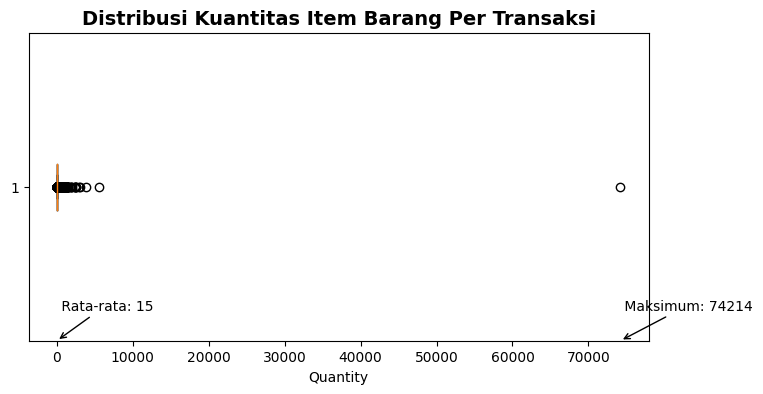

Nilai persentil ke-95: 47
Nilai persentil ke-99: 127


In [48]:
# mengidentifikasi outlier pada data quantity

plt.figure(figsize=(8, 4))
plt.boxplot(df_joined['quantity'], vert=False)
plt.xlabel('Quantity')
plt.title('Distribusi Kuantitas Item Barang Per Transaksi', fontsize=14, fontweight='semibold')

# Menambahkan tanda anak panah untuk nilai rata-rata
mean_value = np.mean(df_joined['quantity'])
plt.annotate(f' Rata-rata: {mean_value:.0f}', xy=(mean_value, 0.5), xytext=(mean_value + 10, 0.6),
             arrowprops=dict(arrowstyle='->'))

# Menambahkan tanda anak panah untuk nilai maksimum
max_value = np.max(df_joined['quantity'])
plt.annotate(f' Maksimum: {max_value:.0f}', xy=(max_value, 0.5), xytext=(max_value + 10, 0.6),
             arrowprops=dict(arrowstyle='->'))

plt.show()

# Identifikasi outlier
percentiles = np.percentile(df_joined['quantity'], [95, 99])
print(f"Nilai persentil ke-95: {percentiles[0]:.0f}")
print(f"Nilai persentil ke-99: {percentiles[1]:.0f}")

In [49]:
# Mengidentifikasi data dengan 'quantity' lebih dari 127

quantity_greater_than_127 = df_joined[df_joined['quantity'] > 127]
jumlah_data = quantity_greater_than_127.shape[0]
print("Jumlah data dengan 'quantity' lebih dari 127 item:", jumlah_data)
print()
print("Data dengan 'quantity' lebih dari 127 item:")
quantity_greater_than_127

Jumlah data dengan 'quantity' lebih dari 127 item: 1002

Data dengan 'quantity' lebih dari 127 item:


,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length
369,536387,79321,191,2016-12-01 09:58:00,21708,0,Shop 0,79321,0.00,5
430,539101,79321,199,2016-12-16 10:35:00,21708,0,Shop 5,79321,0.00,5
502,540175,79321,479,2017-01-05 12:37:00,22211,1,Shop 7,79321,0.00,5
530,541670,22965,143,2017-01-20 12:34:00,20590,0,Shop 24,22965,1.85,5
566,540468,22189,166,2017-01-07 13:55:00,33580,0,Shop 0,22189,2.31,5
...,...,...,...,...,...,...,...,...,...,...
104545,541220,21292,383,2017-01-14 14:11:00,19835,0,Shop 5,21292,0.64,5
104568,543049,79063C,319,2017-02-03 10:09:00,34526,0,Shop 0,79063C,0.00,6
104870,541431,23166,74214,2017-01-18 10:01:00,18025,0,Shop 15,23166,1.04,5
105003,544652,79337,191,2017-02-22 12:53:00,19373,0,Shop 10,79337,0.38,5


**Kesimpulan :**

* Rata-rata jumlah item per transaksi adalah sebanyak **15 item per transaksi**
* Terdapat kuantitas item per transaksi yang sangat tinggi pada data, yaitu **sebanyak 74.214 item dalam satu kali transaksi** yang kami kategorikan sebagai outlier
* Sebagian besar transaksi pelanggan (95%) melibatkan pembelian dengan kuantitas barang per transaksi kurang dari **48 unit**. Hanya sekitar **1% dari transaksi** dengan kuantitas barang yang sangat tinggi, lebih dari **127 unit per transaksi**
* Jumlah baris yang dikategorikan sebagai outlier adalah sebanyak **1.002 baris data**

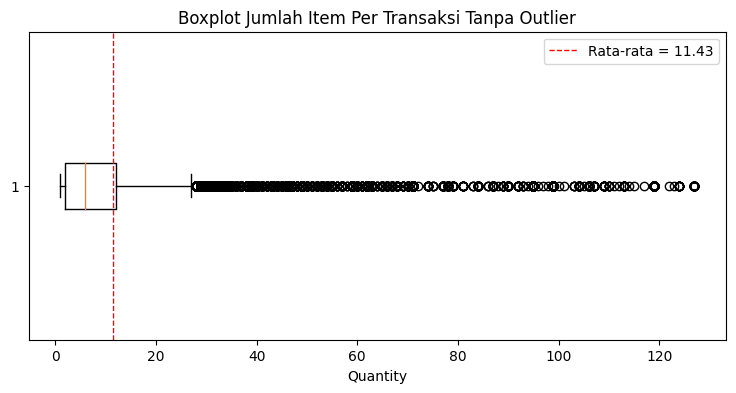

In [50]:
# Identifikasi boxplot dengan jumlah item per transaksi <= 127 (no outliers)
df_no_outliers = df_joined[df_joined['quantity'] <= 127]
plt.figure(figsize=(9, 4))
plt.boxplot(df_no_outliers['quantity'], vert=False)
plt.title('Boxplot Jumlah Item Per Transaksi Tanpa Outlier')
plt.xlabel('Quantity')

# Menghitung nilai rata-rata
mean_quantity = df_no_outliers['quantity'].mean()

# Menambahkan garis vertikal untuk nilai rata-rata
plt.axvline(mean_quantity, color='r', linestyle='dashed', linewidth=1, label=f'Rata-rata = {mean_quantity:.2f}')

# Menampilkan legenda
plt.legend()

plt.show()

**Kesimpulan :**

* Kami memutuskan untuk menghapus **1% data** yang menunjukkan jumlah item yang dibeli per transaksi **lebih dari 127 item**, karena jumlah ini sangat jarang terjadi dari aktifitas pembelian oleh konsumen.

* Rata-rata jumlah item per transaksi saat ini menjadi sekitar **11 item per transaksi**

In [51]:
# Memuat Dataset baru

df_joined = df_no_outliers.copy()
df_joined

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,5
1,541104,21873,29,2017-01-13 14:29:00,27611,0,Shop 0,21873,0.42,5
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,21873,0.42,5
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,21873,0.42,5
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,5
...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,16206B,1.25,6
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65,5
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38,6
105331,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95,6


**Kesimpulan :**

Jumlah baris data **setelah melakukan sejumlah penyesuaian terhadap kolom Quantity** adalah sebanyak **100.283 baris data**

#### **Price**

In [52]:
# Menghitung jumlah baris dimana 'price_per_one' adalah 0
jumlah_nilai_nol = (df_joined['price_per_one'] == 0).sum()

# Menghitung persentase nilai nol
persentase_nilai_nol = (jumlah_nilai_nol / len(df_joined)) * 100
persentase_nilai_nol = round(persentase_nilai_nol, 1)  # Membulatkan ke satu angka belakang koma

# Membuat tabel
table = PrettyTable()
table.field_names = ["Deskripsi", "Jumlah"]
table.add_row(["Jumlah Total Baris Dimana Harga Per Item = 0", jumlah_nilai_nol])
table.add_row(["Persentase Terhadap Keseluruhan Baris Data", "{}%".format(persentase_nilai_nol)])

# Mencetak tabel
print("Tabel: Jumlah dan Persentase Harga Per Item = 0")
print(table)


Tabel: Jumlah dan Persentase Harga Per Item = 0
+----------------------------------------------+--------+
|                  Deskripsi                   | Jumlah |
+----------------------------------------------+--------+
| Jumlah Total Baris Dimana Harga Per Item = 0 | 15677  |
|  Persentase Terhadap Keseluruhan Baris Data  | 15.6%  |
+----------------------------------------------+--------+


<ipython-input-53-19c21806c031>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Accent_r')(np.linspace(0, 1, num_colors))  # Menggunakan palet warna Set3


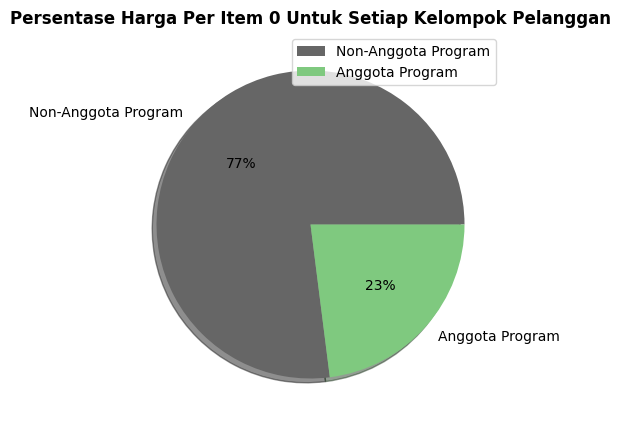

In [53]:
# Data jumlah 'price_per_one' yang bernilai 0 untuk setiap 'loyalty_program'

# Data jumlah 'price_per_one' yang bernilai 0 untuk setiap 'loyalty_program'
price_per_one_zero = df_joined[df_joined['price_per_one'] == 0].groupby('loyalty_program')['price_per_one'].count()
labels = ['Non-Anggota Program', 'Anggota Program']
sizes = price_per_one_zero.values

num_colors = len(price_per_one_zero)
colors = plt.cm.get_cmap('Accent_r')(np.linspace(0, 1, num_colors))  # Menggunakan palet warna Set3

# Menampilkan pie chart dengan warna yang telah diubah
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%.0f%%', shadow=True, colors=colors)
plt.title('Persentase Harga Per Item 0 Untuk Setiap Kelompok Pelanggan', fontsize=12, fontweight='semibold')
plt.legend(labels, loc='best')

# Menampilkan pie chart
plt.show()

In [54]:
# Filter data dengan price_per_one bernilai 0
items_with_zero_price = df_joined[df_joined.groupby('item_id')['price_per_one'].transform('all') == 0]

# Ambil item_id dari hasil filter
item_ids_with_zero_price = items_with_zero_price['item_id'].unique()

# Hitung jumlah Item ID yang memiliki seluruh price_per_one bernilai 0
jumlah_item_id_zero_price = len(item_ids_with_zero_price)

# Cetak jumlah Item ID yang memiliki seluruh price_per_one bernilai 0
print("Jumlah Item ID yang memiliki seluruh price_per_one bernilai 0:", jumlah_item_id_zero_price)
print()
print(item_ids_with_zero_price)


Jumlah Item ID yang memiliki seluruh price_per_one bernilai 0: 313

[79321 22372 22300 22376 22550 22682 '85099B' 20966 22374 22470 21539
 22090 20726 22624 22383 22112 '85123A' 85150 21479 '84997C' 22678 90096
 22162 22697 22553 22473 84050 22680 21717 22841 21080 21531 22681
 '84029E' 20910 22427 20724 22620 '84406B' 21801 22665 85064 22652 22837
 21535 22432 21632 22684 '90200C' '17165D' 82583 22699 22689 20719 22476
 21275 48111 22431 20734 22842 22625 21116 22734 21232 'POST' 22865 21743
 22367 48184 21481 84832 22475 22114 21161 82605 22428 22064 22357 22423
 37333 22585 22072 21891 21258 20956 22867 22650 21621 22502 22712 35965
 20685 35957 22666 82599 22327 21888 22626 21648 84917 21559 22617 21670
 '85232B' 21357 21912 22360 48194 '84968E' 79067 21696 22474 21692 22588
 48185 22365 20682 '17091A' 22501 '85099F' 22627 22843 22371 22677 22633
 21040 71477 '85135B' 22525 20854 22139 22520 20615 22198 20941 '84534B'
 '84569B' 85118 21644 '18098C' 84692 84748 '84535B' 22444 '47591

**Kesimpulan :**

* Sebanyak **15.677 baris data** (15.6%) menunjukkan **harga produk per item sebesar 0**. Mayoritas kondisi ini terjadi pada transaksi yang **tidak menggunakan program loyalitas**

* Kami juga menemukan fakta bahwa terdapat **313 item produk** yang seluruhnya memiliki harga produk per item **sebesar 0**. Asumsi awal kami menyatakan bahwa barang-barang ini merupakan *free item*

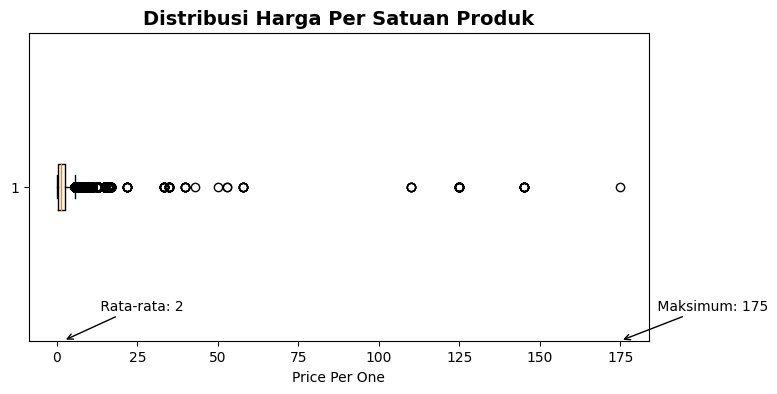

Nilai persentil ke-95: 7
Nilai persentil ke-99: 11


In [55]:
# mengidentifikasi outlier pada data price_per_one

plt.figure(figsize=(8, 4))
plt.boxplot(df_joined['price_per_one'], vert=False)
plt.xlabel('Price Per One')
plt.title('Distribusi Harga Per Satuan Produk', fontsize=14, fontweight='semibold')

# Menambahkan tanda anak panah untuk nilai rata-rata
mean_value = np.mean(df_joined['price_per_one'])
plt.annotate(f' Rata-rata: {mean_value:.0f}', xy=(mean_value, 0.5), xytext=(mean_value + 10, 0.6),
             arrowprops=dict(arrowstyle='->'))

# Menambahkan tanda anak panah untuk nilai maksimum
max_value = np.max(df_joined['price_per_one'])
plt.annotate(f' Maksimum: {max_value:.0f}', xy=(max_value, 0.5), xytext=(max_value + 10, 0.6),
             arrowprops=dict(arrowstyle='->'))

plt.show()

# Identifikasi outlier
percentiles = np.percentile(df_joined['price_per_one'], [95, 99])
print(f"Nilai persentil ke-95: {percentiles[0]:.0f}")
print(f"Nilai persentil ke-99: {percentiles[1]:.0f}")


**Kesimpulan :**

Mayoritas (95%) dari barang yang dijual memiliki harga per unit **kurang dari atau sama dengan 7 dolar**. Hanya **1%** dari barang-barang tersebut yang memiliki harga per unit **lebih dari 11 dolar**. Di sini, kami tidak menganggap harga per unit **diatas 11 dolar sebagai outlier** karena harga per unit yang tinggi tidak selalu menunjukkan data yang tidak valid atau kesalahan. Sebaliknya, kemungkinan ada barang-barang dengan harga yang lebih tinggi seperti barang-barang mewah atau langka yang sah dan dapat berkontribusi pada variasi harga dalam data. Oleh karena itu, **kami mempertahankan data ini** dalam analisis kami untuk memahami keragaman harga produk yang ditawarkan oleh perusahaan.

In [56]:
df_joined

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,5
1,541104,21873,29,2017-01-13 14:29:00,27611,0,Shop 0,21873,0.42,5
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,21873,0.42,5
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,21873,0.42,5
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,5
...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,16206B,1.25,6
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65,5
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38,6
105331,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95,6


**Kesimpulan :**

* Jumlah baris data **setelah melakukan sejumlah penyesuaian terhadap variabel price_per_one** adalah sebanyak **100.283 baris data**
* Persentase pengurangan jumlah baris data setelah melakukan penyesuaian terhadap sejumlah variabel pada dataset adalah sekitar **4.79%**, yang berarti karakteristik data sekitar **95.2%** masih dipertahankan

### **Menambahkan Kolom Yang Relevan Kedalam Dataset**

In [57]:
# Menambahkan kolom Revenue kedalam dataset

df_joined['revenue'] = df_joined['quantity'] * df_joined['price_per_one']
df_joined

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,5,4.62
1,541104,21873,29,2017-01-13 14:29:00,27611,0,Shop 0,21873,0.42,5,12.18
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,21873,0.42,5,0.42
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,21873,0.42,5,0.84
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,5,14.70
...,...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,16206B,1.25,6,1.25
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65,5,8.25
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38,6,13.30
105331,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95,6,1.95


In [58]:
# Menambahkan kolom 'date' yang berisi periode tanggal (YY-mm-dd) kedalam dataset

df_joined['date'] = df_joined['purchasedate'].dt.date

# Menampilkan dataset yang telah ditambahkan kolom 'days'
df_joined

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length,revenue,date
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,5,4.62,2016-12-10
1,541104,21873,29,2017-01-13 14:29:00,27611,0,Shop 0,21873,0.42,5,12.18,2017-01-13
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,21873,0.42,5,0.42,2017-01-07
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,21873,0.42,5,0.84,2017-01-18
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,5,14.70,2017-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,16206B,1.25,6,1.25,2016-12-23
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65,5,8.25,2016-12-15
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38,6,13.30,2016-12-14
105331,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95,6,1.95,2016-12-23


# **Analisis Data Eksploratif**
   
1. Identifikasi Pelanggan:
    * Hitung jumlah pelanggan dan proporsi pelanggan yang merupakan anggota program loyalitas dan yang bukan

2. Analisis Transaksi:
    * Identifikasi pola distribusi jumlah transaksi untuk setiap kelompok (anggota vs. non-anggota).
    * Bandingkan rata-rata jumlah item per transaksi antara kedua kelompok.
    * Analisis rata-rata tingkat spending money per item untuk kedua kelompok.

3. Analisis Nilai Pembelian:
    * Analisis pola distribusi rata-rata nilai pembelian untuk setiap kelompok pelanggan.
    * Bandingkan rata-rata nilai pembelian per customer antara anggota dan non-anggota program loyalitas.

4. Preferensi Produk:
    * Identifikasi produk yang sering dibeli oleh anggota program loyalitas dan yang bukan.
    * Analisis preferensi produk antara kedua kelompok.

In [59]:
loy_data = df_joined.copy()
loy_data

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length,revenue,date
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,5,4.62,2016-12-10
1,541104,21873,29,2017-01-13 14:29:00,27611,0,Shop 0,21873,0.42,5,12.18,2017-01-13
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,21873,0.42,5,0.42,2017-01-07
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,21873,0.42,5,0.84,2017-01-18
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,5,14.70,2017-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,16206B,1.25,6,1.25,2016-12-23
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65,5,8.25,2016-12-15
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38,6,13.30,2016-12-14
105331,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95,6,1.95,2016-12-23


In [60]:
# memuat informasi

print("Total Jumlah Pengguna :", loy_data['customerid'].nunique(), 'User')
print("Total Jumlah Transaksi :", loy_data['purchaseid'].nunique(), 'Transaksi')
print('Total Revenue :',loy_data['revenue'].sum())
print("Periode Analisa :", loy_data['date'].min(), 'hingga', loy_data['date'].max())
print('Varian Jumlah Item Yang Tersedia Pada Platform :',loy_data['item_id'].nunique(), 'Produk')

Total Jumlah Pengguna : 2115 User
Total Jumlah Transaksi : 3756 Transaksi
Total Revenue : 1605609.61
Periode Analisa : 2016-12-01 hingga 2017-02-28
Varian Jumlah Item Yang Tersedia Pada Platform : 2771 Produk


In [61]:
# Menghapus kolom 'productid' dan 'item_id_length'
loy_data = loy_data.drop(['productid', 'item_id_length'], axis=1)
loy_data

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,price_per_one,revenue,date
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42,4.62,2016-12-10
1,541104,21873,29,2017-01-13 14:29:00,27611,0,Shop 0,0.42,12.18,2017-01-13
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,0.42,0.42,2017-01-07
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,0.42,0.84,2017-01-18
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,0.42,14.70,2017-01-19
...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,1.25,1.25,2016-12-23
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,1.65,8.25,2016-12-15
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,0.38,13.30,2016-12-14
105331,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,1.95,1.95,2016-12-23


## **Proporsi Pelanggan Anggota Program VS Non-Anggota Program Loyalitas**

**Kami menduga bahwa dalam dataset ini mungkin terdapat pelanggan yang memiliki dua status keanggotaan yang berbeda. Ini mengindikasikan bahwa pelanggan tersebut mungkin telah mengubah statusnya dari yang sebelumnya belum mendaftar program loyalitas menjadi mendaftar, atau sebaliknya.**

In [62]:
# Mengelompokkan data berdasarkan CustomerID dan menghitung jumlah unik dari loyalty_program
loyalty_counts = loy_data.groupby('customerid')['loyalty_program'].nunique()

# Membuat dictionary untuk menyimpan status loyalitas awal dan akhir pelanggan
loyalty_status = {}

# Iterasi melalui CustomerID
for customer_id in loyalty_counts.index:
    # Jika jumlah unik loyalty_program == 2, berarti pelanggan telah mengubah status loyalitasnya
    if loyalty_counts[customer_id] == 2:
        loyalty_status[customer_id] = "Customer Beralih status keanggotan"
    # Jika jumlah unik loyalty_program == 1, berarti pelanggan tetap setia atau belum menjadi anggota
    else:
        loyalty_status[customer_id] = "Customer Tidak berubah status keanggotaan"

# Menampilkan status loyalitas pelanggan
for customer_id, status in loyalty_status.items():
    print(f"CustomerID: {customer_id}, Status Loyalitas: {status}")

CustomerID: 18026, Status Loyalitas: Customer Tidak berubah status keanggotaan
CustomerID: 18027, Status Loyalitas: Customer Tidak berubah status keanggotaan
CustomerID: 18029, Status Loyalitas: Customer Tidak berubah status keanggotaan
CustomerID: 18031, Status Loyalitas: Customer Tidak berubah status keanggotaan
CustomerID: 18035, Status Loyalitas: Customer Tidak berubah status keanggotaan
CustomerID: 18038, Status Loyalitas: Customer Tidak berubah status keanggotaan
CustomerID: 18040, Status Loyalitas: Customer Tidak berubah status keanggotaan
CustomerID: 18041, Status Loyalitas: Customer Tidak berubah status keanggotaan
CustomerID: 18044, Status Loyalitas: Customer Tidak berubah status keanggotaan
CustomerID: 18049, Status Loyalitas: Customer Tidak berubah status keanggotaan
CustomerID: 18051, Status Loyalitas: Customer Tidak berubah status keanggotaan
CustomerID: 18052, Status Loyalitas: Customer Tidak berubah status keanggotaan
CustomerID: 18056, Status Loyalitas: Customer Tidak 

In [63]:
# Mengelompokkan data berdasarkan CustomerID dan menghitung jumlah unik dari loyalty_program
loyalty_counts = loy_data.groupby('customerid')['loyalty_program'].nunique()

# Memfilter CustomerID yang memiliki dua nilai loyalty_program (1 dan 2)
customer_ids_with_both = loyalty_counts[loyalty_counts == 2].index.tolist()

# Memeriksa apakah ada pelanggan yang mengubah status keanggotaan program loyalitas
if len(customer_ids_with_both) > 0:
    print("Ada pelanggan yang mengubah status keanggotaan program loyalitas.")
    print("CustomerID yang memiliki dua nilai loyalty_program:")
    print(customer_ids_with_both)
else:
    print("Tidak Ada Pengguna Yang Mengubah Status Keanggotaan Program Loyalitas")

Tidak Ada Pengguna Yang Mengubah Status Keanggotaan Program Loyalitas


**Kesimpulan :**

Dapat disimpulkan bahwa **ternyata tidak ada pelanggan yang mengubah status keanggotaan**, yang berarti **setiap pelanggan di dalam dataset teridentifikasi berdasarkan 1 status keanggotaan saja**, yaitu apakah mereka yang memutuskan untuk bergabung atau tidak dalam program loyalitas yang ditawarkan oleh perusahaan.

In [64]:
from prettytable import PrettyTable

# Mengidentifikasi jumlah pelanggan yang unik
total_unique_cust = loy_data['customerid'].nunique()

# Mengelompokkan data berdasarkan 'loyalty_program' dan menghitung jumlah pelanggan unik dalam setiap grup
loyalty_cust_counts = loy_data.groupby('loyalty_program')['customerid'].nunique()

# Membuat tabel untuk output
table = PrettyTable()
table.field_names = ["Deskripsi", "Jumlah", "Persentase"]

# Tambahkan baris untuk Jumlah Total Pelanggan
table.add_row(["Jumlah Total Pelanggan", total_unique_cust, "100.00%"])

# Tambahkan baris untuk setiap Loyalty Program
for program, count in loyalty_cust_counts.items():
    percentage = (count / total_unique_cust) * 100
    table.add_row([f"Jumlah Pelanggan untuk Loyalty Program {program}", count, f"{percentage:.2f}%"])

# Mengatur ukuran font pada tabel
table.align = "l"  # Teks diatur menjadi rata kiri

# Menampilkan tabel
print(table)


+------------------------------------------+--------+------------+
| Deskripsi                                | Jumlah | Persentase |
+------------------------------------------+--------+------------+
| Jumlah Total Pelanggan                   | 2115   | 100.00%    |
| Jumlah Pelanggan untuk Loyalty Program 0 | 1557   | 73.62%     |
| Jumlah Pelanggan untuk Loyalty Program 1 | 558    | 26.38%     |
+------------------------------------------+--------+------------+


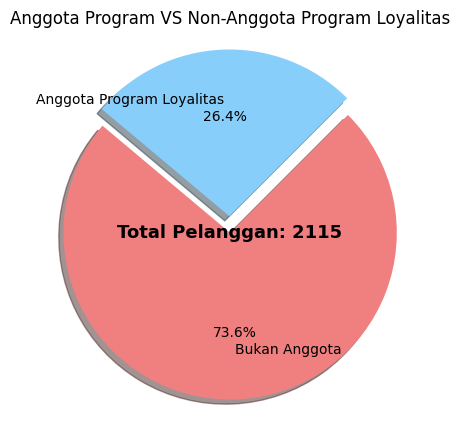

In [65]:
# Menghitung jumlah pelanggan yang merupakan anggota dan bukan anggota program loyalitas
loyalty_counts = loy_data.groupby('loyalty_program')['customerid'].nunique()

# Membuat label untuk pie chart
labels = ['Bukan Anggota', 'Anggota Program Loyalitas']

# Membuat data untuk pie chart
sizes = loyalty_counts.values

# Warna yang akan digunakan pada pie chart
colors = ['lightcoral', 'lightskyblue']

# Memisahkan potongan pie chart
explode = (0.1, 0)

# Mengatur posisi label
label_distance = 0.7

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140,
        labeldistance=label_distance)
plt.title('Anggota Program VS Non-Anggota Program Loyalitas')
plt.axis('equal')

# Menambahkan anotasi jumlah total pelanggan
total_customers = sizes.sum()
plt.annotate(f"Total Pelanggan: {total_customers}", (0.0, -0.1), fontsize=13, color='black', ha='center', va='center', fontweight='semibold')

# Menampilkan pie chart
plt.show()

**Kesimpulan :**

1. **Proporsi antar customer tidak seimbang**. Dari total **2.115 pelanggan**, hanya **26.4% pelanggan** yang **bergabung kedalam keanggotaan program loyalitas**, sedangkan mayoritas (73.6% pelanggan) tidak menjadi anggota program tersebut.

2. Terdapat indikasi bahwa **sekitar 73.6% dari total pelanggan tidak tertarik** untuk menjadi anggota program loyalitas yang ditawarkan oleh perusahaan "Home World" yang mungkin saja menunjukkan bahwa program tersebut belum sepenuhnya efektif dalam menarik minat pelanggan untuk bergabung.

3. Perusahaan mungkin perlu melakukan **peninjauan atas manfaat yang ditawarkan dalam program**, atau perlu dilakukan promosi yang lebih aktif untuk mendorong pelanggan untuk bergabung.

## **Analisis Pola Transaksi (Anggota VS Non-Anggota Program Loyalitas)**

#### **Total Transaksi Per Pengguna Untuk Setiap Kelompok**

In [66]:
# Analisis total transaksi per periode untuk setiap kelompok pengguna

transact_by_customer = loy_data.groupby(['customerid', 'loyalty_program'])['purchaseid'].nunique().reset_index()

# Mengganti nama kolom purchaseid menjadi total_transaksi
transact_by_customer = transact_by_customer.rename(columns={'purchaseid': 'total_transaksi'})
transact_by_customer.sort_values(by='total_transaksi', ascending=True)

,customerid,loyalty_program,total_transaksi
1057,21794,0,1
1410,23075,1,1
1405,23055,1,1
1403,23052,1,1
1401,23050,1,1
...,...,...,...
228,18768,0,23
653,20285,0,26
840,20990,0,26
1538,23529,1,34


Informasi Total Transaksi:
+---------------------+---------------------------+---------------------------------+
|  Kelompok Pelanggan | Rata-rata Total Transaksi | Standar Deviasi Total Transaksi |
+---------------------+---------------------------+---------------------------------+
| Non-Anggota Program |            1.7            |               2.19              |
|   Anggota Program   |            1.98           |               2.14              |
+---------------------+---------------------------+---------------------------------+



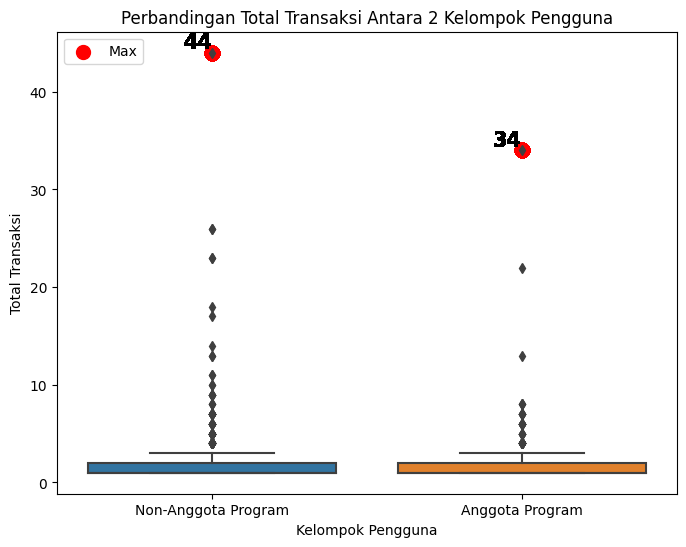

In [67]:
# Membagi data berdasarkan 'loyalty_program'
loyalty_program_0 = transact_by_customer[transact_by_customer['loyalty_program'] == 0]
loyalty_program_1 = transact_by_customer[transact_by_customer['loyalty_program'] == 1]

# Menghitung rata-rata total transaksi untuk loyalty_program 0
average_total_transaksi_0 = round(loyalty_program_0['total_transaksi'].mean(),2)

# Menghitung rata-rata total transaksi untuk loyalty_program 1
average_total_transaksi_1 = round(loyalty_program_1['total_transaksi'].mean(),2)

# Menghitung standar deviasi total transaksi untuk loyalty_program 0
std_deviation_total_transaksi_0 = round(loyalty_program_0['total_transaksi'].std(), 2)

# Menghitung standar deviasi total transaksi untuk loyalty_program 1
std_deviation_total_transaksi_1 = round(loyalty_program_1['total_transaksi'].std(), 2)

# Data rata-rata total transaksi dan standar deviasi
data = [
    ["Non-Anggota Program", average_total_transaksi_0, std_deviation_total_transaksi_0],
    ["Anggota Program", average_total_transaksi_1, std_deviation_total_transaksi_1]
]

# Membuat tabel
table = PrettyTable()
table.field_names = ["Kelompok Pelanggan", "Rata-rata Total Transaksi", "Standar Deviasi Total Transaksi"]

for row in data:
    table.add_row(row)

# Mencetak tabel
print("Informasi Total Transaksi:")
print(table)

print()

# Membuat grafik boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='loyalty_program', y='total_transaksi', data=transact_by_customer)
plt.title('Perbandingan Total Transaksi Antara 2 Kelompok Pengguna')
plt.xlabel('Kelompok Pengguna')
plt.ylabel('Total Transaksi')
plt.xticks(ticks=[0, 1], labels=['Non-Anggota Program', 'Anggota Program'])

# Menambahkan nilai maksimum pada grafik
max_values_0 = [loyalty_program_0['total_transaksi'].max()] * len(loyalty_program_0)
max_values_1 = [loyalty_program_1['total_transaksi'].max()] * len(loyalty_program_1)
plt.scatter(x=[0] * len(loyalty_program_0), y=max_values_0, marker='o', color='red', label='Max', s=100)
plt.scatter(x=[1] * len(loyalty_program_1), y=max_values_1, marker='o', color='red', s=100)

# Menambahkan notasi nilai pada titik maksimum
for i, value in enumerate(max_values_0):
    plt.text(0, value, f'{value}', ha='right', va='bottom', color='black', fontsize=15, fontweight='bold')

for i, value in enumerate(max_values_1):
    plt.text(1, value, f'{value}', ha='right', va='bottom', color='black', fontsize=15, fontweight='bold')

plt.legend(loc='upper left')
plt.show()


**Kesimpulan :**

* **Rata-rata Total Transaksi** : **Anggota Program Loyalitas** memiliki rata-rata total transaksi yang **sedikit lebih tinggi** daripada **Non-Anggota Program Loyalitas**. Ini menunjukkan bahwa **program loyalitas dapat memberikan dorongan tambahan kepada pelanggan untuk melakukan transaksi lebih banyak**

* **Standar Deviasi Total Transaksi**: Sebaran jumlah transaksi per pengguna  untuk kelompok **Anggota Program Loyalitas** adalah sekitar **2.14**, sementara untuk **Non-Anggota Program Loyalitas**  adalah sekitar **2.19**. Total transaksi pengguna dalam kelompok **Anggota Program Loyalitas** menunjukkan adanya variasi jumlah transaksi per pengguna yang sedikit **lebih rendah**

* Nilai maksimum jumlah transaksi tertinggi adalah untuk kelompok **Non-Anggota Program** dimana terdapat customer yang melakukan setidaknya **44 kali transaksi di website perusahaan**

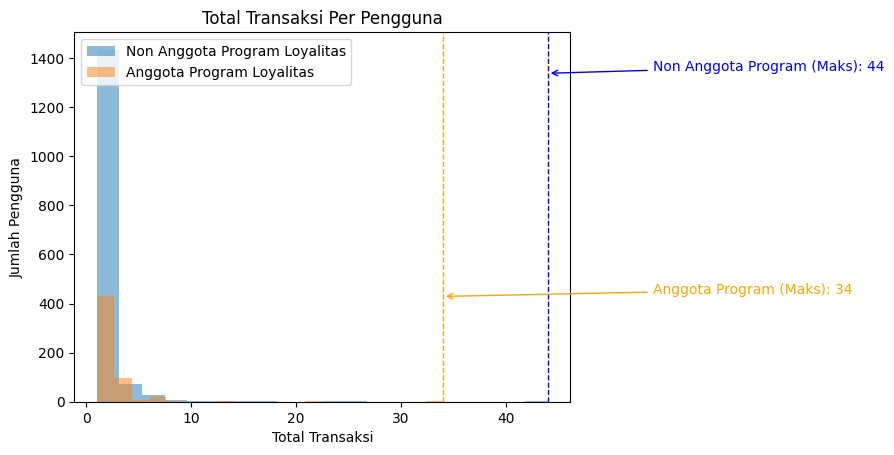

In [68]:
# Identifikasi frekuensi tertinggi pada histogram untuk loyalty_program 0
hist_loyalty_program_0, bin_edges_0 = np.histogram(loyalty_program_0['total_transaksi'], bins=30)
max_freq_0 = np.max(hist_loyalty_program_0)

# Identifikasi frekuensi tertinggi pada histogram untuk loyalty_program 1
hist_loyalty_program_1, bin_edges_1 = np.histogram(loyalty_program_1['total_transaksi'], bins=30)
max_freq_1 = np.max(hist_loyalty_program_1)

# Mencari nilai maksimum jumlah transaksi per customer untuk loyalty_program 0
max_transaction_0 = loyalty_program_0['total_transaksi'].max()

# Mencari nilai maksimum jumlah transaksi untuk loyalty_program 1
max_transaction_1 = loyalty_program_1['total_transaksi'].max()

# Membuat histogram untuk total transaksi pada loyalty_program 0
plt.hist(loyalty_program_0['total_transaksi'], bins=20, alpha=0.5, label='Non Anggota Program Loyalitas')

# Membuat histogram untuk total transaksi pada loyalty_program 1
plt.hist(loyalty_program_1['total_transaksi'], bins=20, alpha=0.5, label='Anggota Program Loyalitas')

# Menambahkan garis vertikal untuk nilai maksimum pada loyalty_program 0
plt.axvline(x=max_transaction_0, color='blue', linestyle='dashed', linewidth=1)

# Menambahkan teks anotasi untuk garis maksimum pada loyalty_program 0
plt.annotate(f'Non Anggota Program (Maks): {max_transaction_0}',
             xy=(max_transaction_0, max_freq_0),
             xytext=(max_transaction_0 + 10, max_freq_0 + 10),
             color='blue',
             arrowprops=dict(arrowstyle='->', color='blue'))

# Menambahkan garis vertikal untuk nilai maksimum pada loyalty_program 1
plt.axvline(x=max_transaction_1, color='orange', linestyle='dashed', linewidth=1)

# Menambahkan teks anotasi untuk garis maksimum pada loyalty_program 1
plt.annotate(f'Anggota Program (Maks): {max_transaction_1}',
             xy=(max_transaction_1, max_freq_1),
             xytext=(max_transaction_1 + 20, max_freq_1 + 10),
             color='orange',
             arrowprops=dict(arrowstyle='->', color='orange'))

# Memberikan label pada sumbu x dan y serta judul
plt.xlabel('Total Transaksi')
plt.ylabel('Jumlah Pengguna')
plt.title('Total Transaksi Per Pengguna')

# Menambahkan legenda
plt.legend()

# Menampilkan histogram
plt.show()

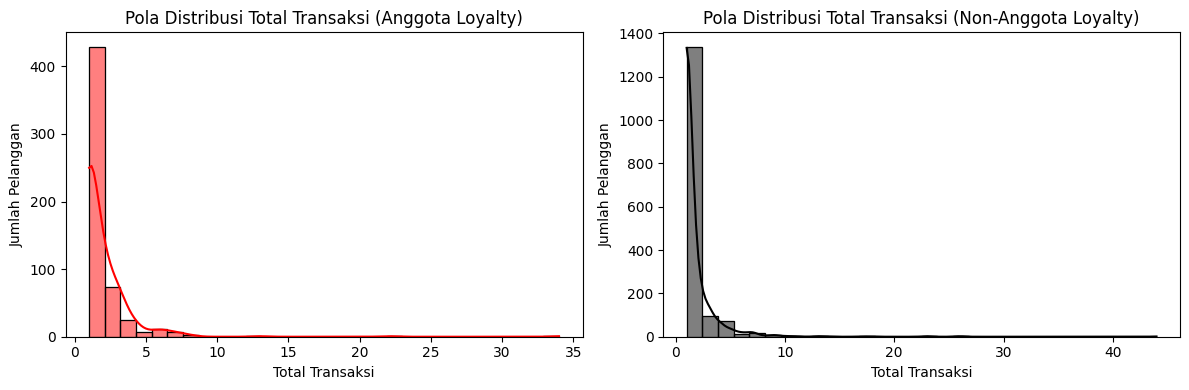

In [69]:
# Mengidentifikasi pola distribusi jumlah transaksi per customer untuk kedua kelompok kategori

# Filter data untuk non-anggota program loyalitas
loyalty_members = transact_by_customer[transact_by_customer['loyalty_program'] == True]

# Filter data untuk non-anggota program loyalitas
non_loyalty_members = transact_by_customer[transact_by_customer['loyalty_program'] == False]

# Buat dua subplot untuk grafik histogram
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot histogram dan kepadatan untuk anggota program loyalitas (mengubah warna menjadi merah)
sns.histplot(data=loyalty_members, x='total_transaksi', kde=True, ax=axes[0], bins=30, color='red')
axes[0].set_title('Pola Distribusi Total Transaksi (Anggota Loyalty)')
axes[0].set_xlabel('Total Transaksi')
axes[0].set_ylabel('Jumlah Pelanggan')

# Plot histogram dan kepadatan untuk non-anggota program loyalitas (mengubah warna menjadi hitam)
sns.histplot(data=non_loyalty_members, x='total_transaksi', kde=True, ax=axes[1], bins=30, color='black')
axes[1].set_title('Pola Distribusi Total Transaksi (Non-Anggota Loyalty)')
axes[1].set_xlabel('Total Transaksi')
axes[1].set_ylabel('Jumlah Pelanggan')

plt.tight_layout()
plt.show()

**Kesimpulan :**
  
Kelompok **Anggota Program Loyalitas** cenderung melakukan transaksi **lebih banyak** secara keseluruhan dibandingkan dengan kelompok **Non-Anggota Program Loyalitas**, dengan tingkat variasi jumlah transaksi per pengguna yang hampir serupa di antara keduanya

### **Total Item Per Transaksi (Per Customer) Untuk Setiap Kelompok Pengguna**

In [70]:
# Menghitung nilai median 'quantity' per 'CustomerID' dan 'loyalty_program'
quantity_by_customer = loy_data.groupby(['customerid', 'loyalty_program'])['quantity'].median().reset_index()

# Mengurutkan data berdasarkan 'loyalty_program' dan 'customerid'
quantity_by_customer = quantity_by_customer.sort_values(by=['loyalty_program', 'customerid'])

# Mengubah nama kolom 'quantity' menjadi 'average_quantity' dan menghilangkan koma
quantity_by_customer['average_quantity'] = quantity_by_customer['quantity'].astype(int)

# Menghapus kolom 'quantity' yang sudah tidak diperlukan
quantity_by_customer = quantity_by_customer.drop(columns=['quantity'])
quantity_by_customer.sort_values(by='average_quantity', ascending=False)

,customerid,loyalty_program,average_quantity
1550,23549,1,127
1473,23295,1,127
1931,38801,0,119
1570,23628,1,119
1753,29789,0,119
...,...,...,...
2088,46779,0,1
2090,46919,0,1
1676,25326,0,1
2100,47452,0,1


Informasi Jumlah Item Per Transaksi:
+---------------------+---------------------------+-----------------------------+
|  Kelompok Pelanggan | Jumlah Item Per Transaksi | Standar Deviasi Jumlah Item |
+---------------------+---------------------------+-----------------------------+
| Non-Anggota Program |             12            |            15.15            |
|   Anggota Program   |             11            |            14.19            |
+---------------------+---------------------------+-----------------------------+



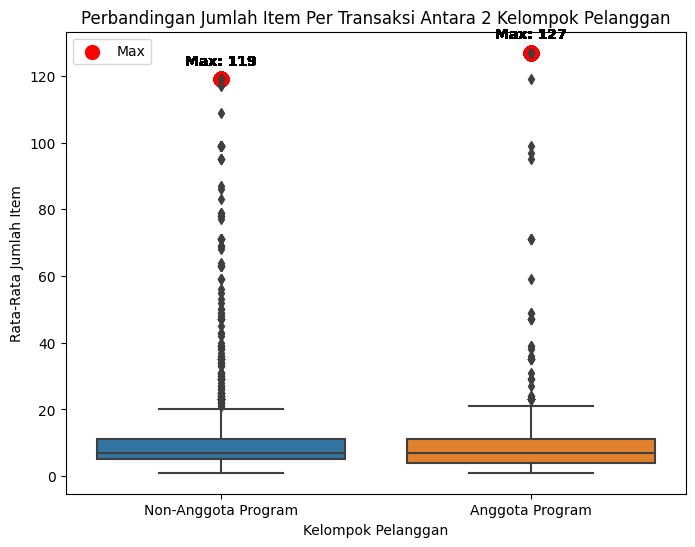

In [71]:
# Membagi data berdasarkan 'loyalty_program'
loyalty_program_0 = quantity_by_customer[quantity_by_customer['loyalty_program'] == 0]
loyalty_program_1 = quantity_by_customer[quantity_by_customer['loyalty_program'] == 1]

# Menghitung rata-rata jumlah item untuk loyalty_program 0
average_avg_quantity_0 = math.ceil(loyalty_program_0['average_quantity'].mean())

# Menghitung rata-rata jumlah item untuk loyalty_program 1
average_avg_quantity_1 = math.ceil(loyalty_program_1['average_quantity'].mean())

# Menghitung standar deviasi jumlah item untuk loyalty_program 0
std_deviation_avg_quantity_0 = round(loyalty_program_0['average_quantity'].std(), 2)

# Menghitung standar deviasi jumlah item untuk loyalty_program 1
std_deviation_avg_quantity_1 = round(loyalty_program_1['average_quantity'].std(), 2)

# Data rata-rata jumlah item dan standar deviasi
data = [
    ["Non-Anggota Program", average_avg_quantity_0, std_deviation_avg_quantity_0],
    ["Anggota Program", average_avg_quantity_1, std_deviation_avg_quantity_1]
]

# Membuat tabel
table = PrettyTable()
table.field_names = ["Kelompok Pelanggan", "Jumlah Item Per Transaksi", "Standar Deviasi Jumlah Item"]

for row in data:
    table.add_row(row)

# Mencetak tabel
print("Informasi Jumlah Item Per Transaksi:")
print(table)

print()

# Membuat grafik boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='loyalty_program', y='average_quantity', data=quantity_by_customer)
plt.title('Perbandingan Jumlah Item Per Transaksi Antara 2 Kelompok Pelanggan')
plt.xlabel('Kelompok Pelanggan')
plt.ylabel('Rata-Rata Jumlah Item')
plt.xticks(ticks=[0, 1], labels=['Non-Anggota Program', 'Anggota Program'])

# Menambahkan nilai maksimum pada grafik
max_values_0 = [loyalty_program_0['average_quantity'].max()] * len(loyalty_program_0)
max_values_1 = [loyalty_program_1['average_quantity'].max()] * len(loyalty_program_1)
plt.scatter(x=[0] * len(loyalty_program_0), y=max_values_0, marker='o', color='red', label='Max', s=100)
plt.scatter(x=[1] * len(loyalty_program_1), y=max_values_1, marker='o', color='red', s=100)

# Menambahkan notasi nilai pada titik maksimum
for i, value in enumerate(max_values_0):
    plt.annotate(f'Max: {value}', (0, value), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, fontweight='bold')

for i, value in enumerate(max_values_1):
    plt.annotate(f'Max: {value}', (1, value), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, fontweight='bold')

plt.legend(loc='upper left')
plt.show()


**Kesimpulan :**

* **Jumlah Item Per Transaksi:** Rata-rata jumlah item yang dibeli per transaksi untuk kedua kelompok adalah sebanyak **11 item untuk Anggota Program** dan **12 item untuk Non-Anggota Program Loyalitas** yang berarti kelompok **Anggota Program Loyalitas** memiliki **rata-rata jumlah item per transaksi yang sedikit lebih rendah**

* **Standar Deviasi Jumlah Item:** Standar deviasi untuk **Anggota Program sekitar 14.19**, sementara untuk **Non-Anggota Program adalah sekitar 15.15**. Standar deviasi yang **lebih rendah** pada kelompok **Anggota Program Loyalitas** menunjukkan bahwa jumlah item per transaksi yang dilakukan oleh pengguna pada kelompok ini memiliki **variasi yang lebih rendah**

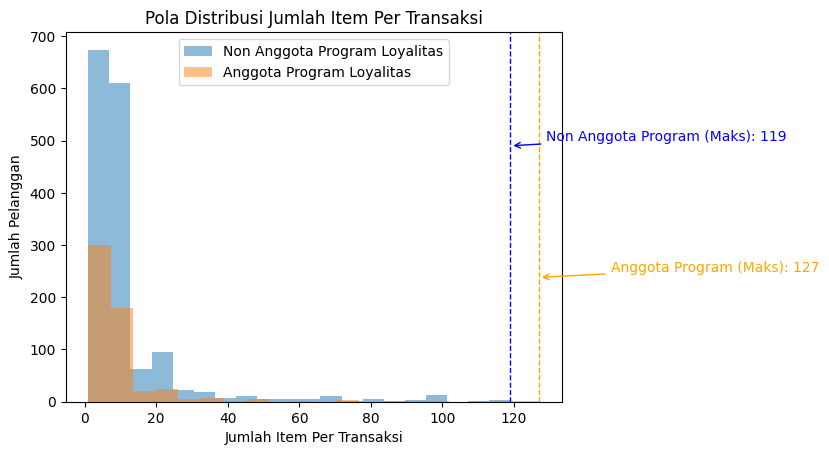

In [72]:
# Identifikasi frekuensi tertinggi pada histogram untuk loyalty_program 0
hist_loyalty_program_0, bin_edges_0 = np.histogram(loyalty_program_0['average_quantity'], bins=30)
max_freq_0 = np.max(hist_loyalty_program_0)

# Identifikasi frekuensi tertinggi pada histogram untuk loyalty_program 1
hist_loyalty_program_1, bin_edges_1 = np.histogram(loyalty_program_1['average_quantity'], bins=30)
max_freq_1 = np.max(hist_loyalty_program_1)

# Mencari nilai maksimum jumlah item per transaksi untuk loyalty_program 0
max_quantity_0 = loyalty_program_0['average_quantity'].max()

# Mencari nilai maksimum jumlah item per transaksi untuk loyalty_program 1
max_quantity_1 = loyalty_program_1['average_quantity'].max()

# Membuat histogram untuk jumlah item per transaksi pada loyalty_program 0
plt.hist(loyalty_program_0['average_quantity'], bins=20, alpha=0.5, label='Non Anggota Program Loyalitas')

# Membuat histogram untuk jumlah item per transaksi pada loyalty_program 1
plt.hist(loyalty_program_1['average_quantity'], bins=20, alpha=0.5, label='Anggota Program Loyalitas')

# Menambahkan garis vertikal untuk nilai maksimum pada loyalty_program 0
plt.axvline(x=max_quantity_0, color='blue', linestyle='dashed', linewidth=1)

# Menambahkan teks anotasi untuk garis maksimum pada loyalty_program 0
plt.annotate(f'Non Anggota Program (Maks): {max_quantity_0}',
             xy=(max_quantity_0, max_freq_0),
             xytext=(max_quantity_0 + 10, max_freq_0 + 10),
             color='blue',
             arrowprops=dict(arrowstyle='->', color='blue'))

# Menambahkan garis vertikal untuk nilai maksimum pada loyalty_program 1
plt.axvline(x=max_quantity_1, color='orange', linestyle='dashed', linewidth=1)

# Menambahkan teks anotasi untuk garis maksimum pada loyalty_program 1
plt.annotate(f'Anggota Program (Maks): {max_quantity_1}',
             xy=(max_quantity_1, max_freq_1),
             xytext=(max_quantity_1 + 20, max_freq_1 + 10),
             color='orange',
             arrowprops=dict(arrowstyle='->', color='orange'))

# Memberikan label pada sumbu x dan y serta judul
plt.xlabel('Jumlah Item Per Transaksi')
plt.ylabel('Jumlah Pelanggan')
plt.title('Pola Distribusi Jumlah Item Per Transaksi')

# Menambahkan legenda
plt.legend()

# Menampilkan histogram
plt.show()

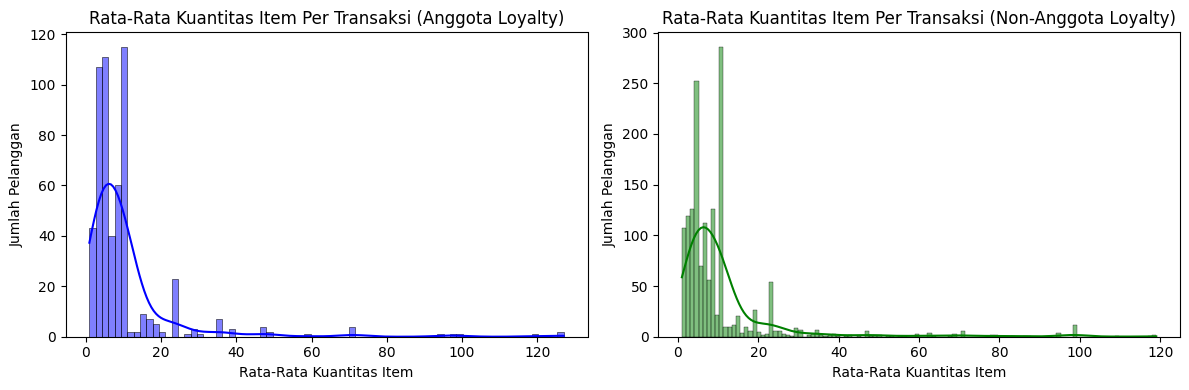

In [73]:
# Filter data untuk anggota program loyalitas
loyalty_members = quantity_by_customer[quantity_by_customer['loyalty_program'] == True]

# Filter data untuk non-anggota program loyalitas
non_loyalty_members = quantity_by_customer[quantity_by_customer['loyalty_program'] == False]

# Buat dua subplot untuk grafik histogram
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot histogram dan kepadatan untuk anggota program loyalitas (mengubah warna menjadi biru)
sns.histplot(data=loyalty_members, x='average_quantity', kde=True, ax=axes[0], color='blue')
axes[0].set_title('Rata-Rata Kuantitas Item Per Transaksi (Anggota Loyalty)')
axes[0].set_xlabel('Rata-Rata Kuantitas Item')
axes[0].set_ylabel('Jumlah Pelanggan')

# Plot histogram dan kepadatan untuk non-anggota program loyalitas (mengubah warna menjadi hijau)
sns.histplot(data=non_loyalty_members, x='average_quantity', kde=True, ax=axes[1], color='green')
axes[1].set_title('Rata-Rata Kuantitas Item Per Transaksi (Non-Anggota Loyalty)')
axes[1].set_xlabel('Rata-Rata Kuantitas Item')
axes[1].set_ylabel('Jumlah Pelanggan')

plt.tight_layout()
plt.show()

**Kesimpulan :**

Kedua kelompok pengguna **cenderung melakukan pembelian dengan jumlah item per transaksi yang relatif sedikit**, tetapi kelompok **Anggota Program Loyalitas** memiliki sedikit keunggulan dalam potensi pembelian besar

### **Rata-Rata Tingkat Harga Per Item Untuk Kedua Kelompok**

Kami akan mengevaluasi rata-rata tingkat harga per item produk yang dibayarkan oleh dua kelompok pengguna, yaitu kelompok anggota program dan kelompok non-anggota program loyalitas. Rata-rata tingkat harga per item ini adalah **ukuran dari sejauh mana pengguna dari kedua kelompok bersedia membayar untuk setiap produk yang mereka beli**. Hasil analisis ini dapat memberikan wawasan yang berharga tentang preferensi harga yang membedakan kedua kelompok pengguna di masing-masing kelompok dan membantu perusahaan dalam mengambil keputusan strategis terkait penetapan harga produk mereka

In [74]:
# Menghitung rata-rata harga produk per customer untuk masing-masing kelompok
spend_money_customer = loy_data.groupby(['customerid', 'loyalty_program'])['price_per_one'].mean().round(2).reset_index()
spend_money_customer = spend_money_customer.sort_values(by=['loyalty_program', 'customerid'])
spend_money_customer['harga_produk_per_customer'] = spend_money_customer['price_per_one']

# Menghapus kolom 'price_per_one' yang sudah tidak diperlukan
spend_money_customer = spend_money_customer.drop(columns=['price_per_one'])
spend_money_customer.sort_values(by='harga_produk_per_customer', ascending=False)

,customerid,loyalty_program,harga_produk_per_customer
1148,22179,1,145.00
888,21189,0,125.00
251,18824,0,125.00
1653,23912,1,110.00
1032,21706,0,73.03
...,...,...,...
2092,46969,0,0.00
1881,36443,0,0.00
1872,36179,0,0.00
2099,47371,0,0.00


Informasi Rata-Rata Harga Produk Per Customer:
+---------------------+--------------------------------+--------------------------------------+
|  Kelompok Pelanggan | Rata-Rata Pengeluaran Per Item | Standar Deviasi Pengeluaran Per Item |
+---------------------+--------------------------------+--------------------------------------+
| Non-Anggota Program |              2.39              |                 5.53                 |
|   Anggota Program   |              2.67              |                 7.7                  |
+---------------------+--------------------------------+--------------------------------------+



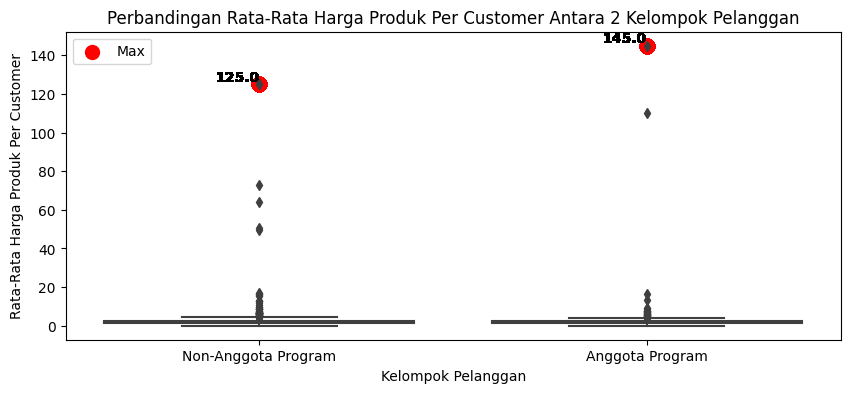

In [75]:
# Membagi data berdasarkan 'loyalty_program'
loyalty_program_0 = spend_money_customer[spend_money_customer['loyalty_program'] == 0]
loyalty_program_1 = spend_money_customer[spend_money_customer['loyalty_program'] == 1]

# Menghitung rata-rata harga_produk_per_customer untuk loyalty_program 0
spend_money_customer_0 = round(loyalty_program_0['harga_produk_per_customer'].mean(), 2)

# Menghitung rata-rata harga_produk_per_customer untuk loyalty_program 1
spend_money_customer_1 = round(loyalty_program_1['harga_produk_per_customer'].mean(), 2)

# Menghitung standar deviasi harga_produk_per_customer untuk loyalty_program 0
std_deviation_spend_money_0 = round(loyalty_program_0['harga_produk_per_customer'].std(), 2)

# Menghitung standar deviasi harga_produk_per_customer untuk loyalty_program 1
std_deviation_spend_money_1 = round(loyalty_program_1['harga_produk_per_customer'].std(), 2)

# Data rata-rata nilai pembelian dan standar deviasi
data = [
    ["Non-Anggota Program", spend_money_customer_0, std_deviation_spend_money_0],
    ["Anggota Program", spend_money_customer_1, std_deviation_spend_money_1]
]

# Membuat tabel
table = PrettyTable()
table.field_names = ["Kelompok Pelanggan", "Rata-Rata Pengeluaran Per Item", "Standar Deviasi Pengeluaran Per Item"]

for row in data:
    table.add_row(row)

# Mencetak tabel
print("Informasi Rata-Rata Harga Produk Per Customer:")
print(table)

print()

# Membuat grafik boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x='loyalty_program', y='harga_produk_per_customer', data=spend_money_customer)
plt.title('Perbandingan Rata-Rata Harga Produk Per Customer Antara 2 Kelompok Pelanggan')
plt.xlabel('Kelompok Pelanggan')
plt.ylabel('Rata-Rata Harga Produk Per Customer')
plt.xticks(ticks=[0, 1], labels=['Non-Anggota Program', 'Anggota Program'])

# Menambahkan nilai maksimum pada grafik
max_values_0 = [loyalty_program_0['harga_produk_per_customer'].max()] * len(loyalty_program_0)
max_values_1 = [loyalty_program_1['harga_produk_per_customer'].max()] * len(loyalty_program_1)
plt.scatter(x=[0] * len(loyalty_program_0), y=max_values_0, marker='o', color='red', label='Max', s=100)
plt.scatter(x=[1] * len(loyalty_program_1), y=max_values_1, marker='o', color='red', s=100)

# Menambahkan notasi nilai pada titik maksimum
for i, value in enumerate(max_values_0):
    plt.text(0, value, f'{value}', ha='right', va='bottom', color='black', fontsize=10, fontweight='bold')

for i, value in enumerate(max_values_1):
    plt.text(1, value, f'{value}', ha='right', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.legend(loc='upper left')
plt.show()

**Kesimpulan :**

* **Rata-Rata Harga Per Item :** Terdapat kecenderungan bahwa produk-produk yang diminati oleh kelompok **Anggota Program Loyalitas** memiliki harga yang sedikit lebih tinggi dibandingkan dengan **kelompok Non-Anggota Program Loyalitas**

* **Standar Deviasi Harga Per Item :** Standar deviasi harga produk untuk kelompok **Anggota Program Loyalitas** sebesar **7.7**, menunjukkan adanya variasi harga produk yang lebih tinggi di dalam kelompok ini. Selain itu terdapat kecenderungan bahwa kelompok **Anggota Program Loyalitas** melakukan pembelian untuk produk-produk dengan harga per item yang lebih mahal.

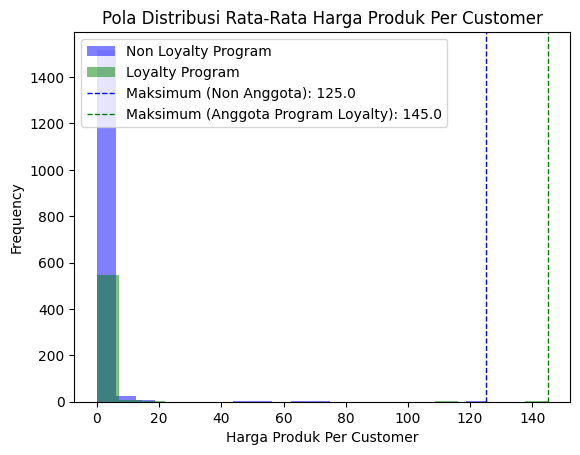

In [76]:
# Membuat histogram untuk nilai pembelian pada loyalty_program 0 (mengubah warna menjadi biru)
plt.hist(loyalty_program_0['harga_produk_per_customer'], bins=20, alpha=0.5, label='Non Loyalty Program', color='blue')

# Membuat histogram untuk Nilai Pembelian pada loyalty_program 1 (mengubah warna menjadi hijau)
plt.hist(loyalty_program_1['harga_produk_per_customer'], bins=20, alpha=0.5, label='Loyalty Program', color='green')

# Mencari nilai maksimum nilai pembelian untuk loyalty_program 0
max_quantity_0 = loyalty_program_0['harga_produk_per_customer'].max()

# Mencari nilai maksimum nilai pembelian untuk loyalty_program 1
max_quantity_1 = loyalty_program_1['harga_produk_per_customer'].max()

# Menambahkan garis vertikal untuk nilai maksimum pada loyalty_program 0
plt.axvline(x=max_quantity_0, color='blue', linestyle='dashed', linewidth=1, label=f'Maksimum (Non Anggota): {max_quantity_0}')

# Menambahkan garis vertikal untuk nilai maksimum pada loyalty_program 1
plt.axvline(x=max_quantity_1, color='green', linestyle='dashed', linewidth=1, label=f'Maksimum (Anggota Program Loyalty): {max_quantity_1}')

# Memberikan label pada sumbu x dan y serta judul
plt.xlabel('Harga Produk Per Customer')
plt.ylabel('Frequency')
plt.title('Pola Distribusi Rata-Rata Harga Produk Per Customer')

# Menambahkan legenda
plt.legend()

# Menampilkan histogram
plt.show()

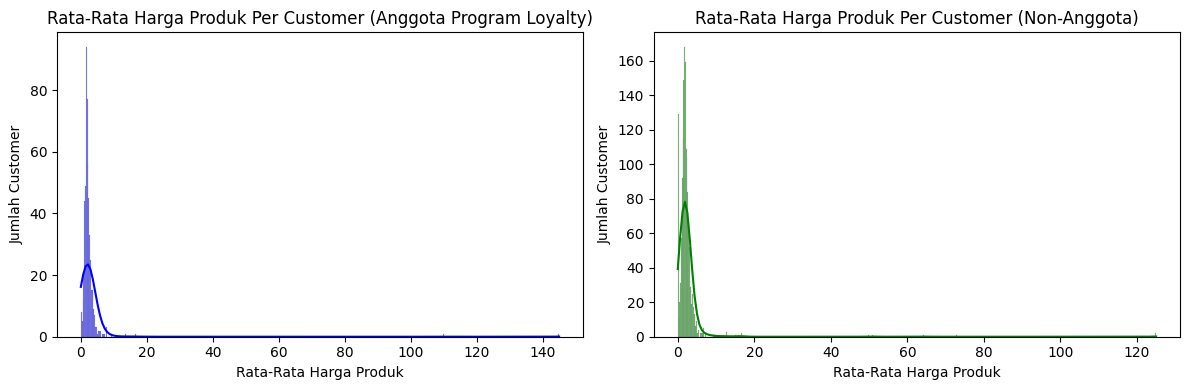

In [77]:
# Filter data untuk anggota program loyalitas
loyalty_members = spend_money_customer[spend_money_customer['loyalty_program'] == True]

# Filter data untuk non-anggota program loyalitas
non_loyalty_members = spend_money_customer[spend_money_customer['loyalty_program'] == False]

# Buat dua subplot untuk grafik histogram
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot histogram dan kepadatan untuk anggota program loyalitas (mengubah warna menjadi biru)
sns.histplot(data=loyalty_members, x='harga_produk_per_customer', kde=True, ax=axes[0], color='blue')
axes[0].set_title('Rata-Rata Harga Produk Per Customer (Anggota Program Loyalty)')
axes[0].set_xlabel('Rata-Rata Harga Produk')
axes[0].set_ylabel('Jumlah Customer')

# Plot histogram dan kepadatan untuk non-anggota program loyalitas (mengubah warna menjadi hijau)
sns.histplot(data=non_loyalty_members, x='harga_produk_per_customer', kde=True, ax=axes[1], color='green')
axes[1].set_title('Rata-Rata Harga Produk Per Customer (Non-Anggota)')
axes[1].set_xlabel('Rata-Rata Harga Produk')
axes[1].set_ylabel('Jumlah Customer')

plt.tight_layout()
plt.show()

**Kesimpulan :**

Secara keseluruhan, **program loyalitas terindikasi memiliki potensi untuk mendorong pelanggan membeli produk-produk dengan harga per item yang lebih tinggi**, sementara juga mempertahankan keragaman preferensi harga. Hal ini bisa menjadi strategi yang efektif dalam meningkatkan nilai pelanggan dan meningkatkan pendapatan perusahaan

## **Analisis Nilai Pembelian (Anggota VS Non-Anggota Program Loyalitas)**

In [78]:
# Menghitung rata-rata nilai pembelian per customer untuk masing-masing kelompok
purchase_by_customer = loy_data.groupby(['customerid', 'loyalty_program'])['revenue'].mean().reset_index()
purchase_by_customer = purchase_by_customer.sort_values(by=['loyalty_program', 'customerid'])
purchase_by_customer['avg_revenue'] = purchase_by_customer['revenue']

# Menghapus kolom 'revenue' yang sudah tidak diperlukan
purchase_by_customer = purchase_by_customer.drop(columns=['revenue'])
purchase_by_customer.sort_values(by='avg_revenue', ascending=False)

,customerid,loyalty_program,avg_revenue
1207,22395,1,726.75
1373,22970,1,543.15
836,20978,0,520.20
209,18708,0,369.75
1653,23912,1,330.00
...,...,...,...
1757,30108,0,0.00
1550,23549,1,0.00
2021,42691,0,0.00
2018,42587,0,0.00


Informasi Rata-Rata Nilai Pembelian Per Customer:
+---------------------+-----------------------------------+--------------------------------------+
|  Kelompok Pelanggan | Rata-Rata Pendapatan Per Pengguna | Standar Deviasi Rata-Rata Pendapatan |
+---------------------+-----------------------------------+--------------------------------------+
| Non-Anggota Program |               $19.94              |               $ 29.16                |
|   Anggota Program   |               $21.04              |               $ 44.38                |
+---------------------+-----------------------------------+--------------------------------------+



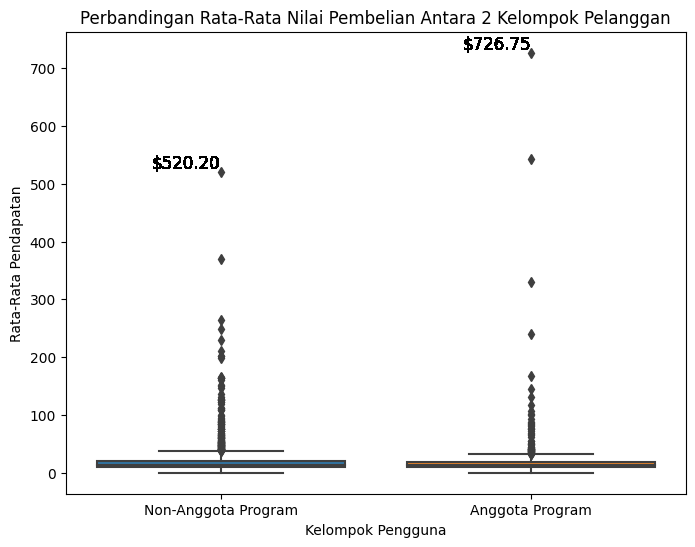

In [79]:
# Membagi data berdasarkan 'loyalty_program'
loyalty_program_0 = purchase_by_customer[purchase_by_customer['loyalty_program'] == 0]
loyalty_program_1 = purchase_by_customer[purchase_by_customer['loyalty_program'] == 1]

# Menghitung rata-rata nilai pembelian untuk loyalty_program 0
average_revenue_0 = round(loyalty_program_0['avg_revenue'].mean(), 2)

# Menghitung rata-rata nilai pembelian untuk loyalty_program 1
average_revenue_1 = round(loyalty_program_1['avg_revenue'].mean(), 2)

# Menghitung standar deviasi nilai pembelian untuk loyalty_program 0
std_deviation_revenue_0 = round(loyalty_program_0['avg_revenue'].std(), 2)

# Menghitung standar deviasi nilai pembelian untuk loyalty_program 1
std_deviation_revenue_1 = round(loyalty_program_1['avg_revenue'].std(), 2)

# Data rata-rata nilai pembelian dan standar deviasi
data = [
    ["Non-Anggota Program", f"${average_revenue_0:.2f}", f"$ {std_deviation_revenue_0:.2f}"],
    ["Anggota Program", f"${average_revenue_1:.2f}", f"$ {std_deviation_revenue_1:.2f}"]
]

# Membuat tabel
table = PrettyTable()
table.field_names = ["Kelompok Pelanggan", "Rata-Rata Pendapatan Per Pengguna", "Standar Deviasi Rata-Rata Pendapatan"]

for row in data:
    table.add_row(row)

# Mencetak tabel
print("Informasi Rata-Rata Nilai Pembelian Per Customer:")
print(table)

print()

# Membuat grafik boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='loyalty_program', y='avg_revenue', data=purchase_by_customer)
plt.title('Perbandingan Rata-Rata Nilai Pembelian Antara 2 Kelompok Pelanggan')
plt.xlabel('Kelompok Pengguna')
plt.ylabel('Rata-Rata Pendapatan')
plt.xticks(ticks=[0, 1], labels=['Non-Anggota Program', 'Anggota Program'])

# Menambahkan nilai maksimum pada grafik
max_values_0 = [loyalty_program_0['avg_revenue'].max()] * len(loyalty_program_0)
max_values_1 = [loyalty_program_1['avg_revenue'].max()] * len(loyalty_program_1)

for i, value in enumerate(max_values_0):
    plt.text(0, value, f'${value:.2f}', ha='right', va='bottom', color='black', fontsize=12)

for i, value in enumerate(max_values_1):
    plt.text(1, value, f'${value:.2f}', ha='right', va='bottom', color='black', fontsize=12)

plt.show()


**Kesimpulan :**

* **Rata-Rata Pendapatan Per Pengguna:** Rata-rata pendapatan per pengguna untuk **Anggota Program Loyalitas** adalah sekitar **21.04 dolar**, sedangkan rata-rata pendapatan per pengguna untuk **Non-Anggota Program Loyalitas** adalah sekitar **19.94 dolar**

* **Standar Deviasi Rata-Rata Pendapatan:** Standar deviasi rata-rata pendapatan untuk **Anggota Program Loyalitas** adalah sekitar **44.38**, sedikit lebih tinggi dibandingkan kelompok **Non-Anggota Program** yaitu sekitar **29.16**. Ini terbukti dari adanya sejumlah pengguna dari **Anggota Program Loyalitas** yang memberikan nilai penjualan yang sangat tinggi

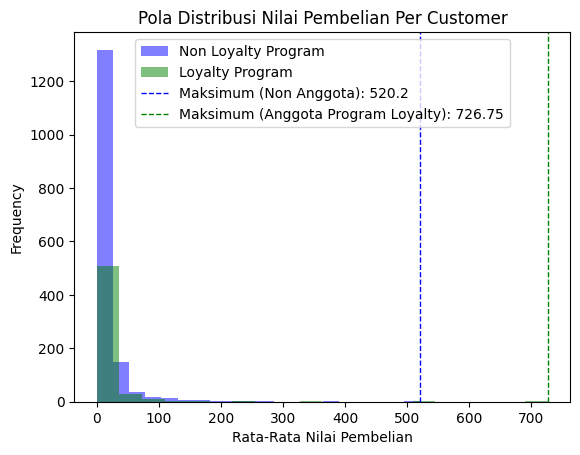

In [80]:
# Membuat histogram untuk nilai pembelian pada loyalty_program 0 (mengubah warna menjadi biru)
plt.hist(loyalty_program_0['avg_revenue'], bins=20, alpha=0.5, label='Non Loyalty Program', color='blue')

# Membuat histogram untuk Nilai Pembelian pada loyalty_program 1 (mengubah warna menjadi hijau)
plt.hist(loyalty_program_1['avg_revenue'], bins=20, alpha=0.5, label='Loyalty Program', color='green')

# Mencari nilai maksimum nilai pembelian untuk loyalty_program 0
max_quantity_0 = loyalty_program_0['avg_revenue'].max()

# Mencari nilai maksimum nilai pembelian untuk loyalty_program 1
max_quantity_1 = loyalty_program_1['avg_revenue'].max()

# Menambahkan garis vertikal untuk nilai maksimum pada loyalty_program 0
plt.axvline(x=max_quantity_0, color='blue', linestyle='dashed', linewidth=1, label=f'Maksimum (Non Anggota): {max_quantity_0}')

# Menambahkan garis vertikal untuk nilai maksimum pada loyalty_program 1
plt.axvline(x=max_quantity_1, color='green', linestyle='dashed', linewidth=1, label=f'Maksimum (Anggota Program Loyalty): {max_quantity_1}')

# Memberikan label pada sumbu x dan y serta judul
plt.xlabel('Rata-Rata Nilai Pembelian')
plt.ylabel('Frequency')
plt.title('Pola Distribusi Nilai Pembelian Per Customer')

# Menambahkan legenda
plt.legend()

# Menampilkan histogram
plt.show()

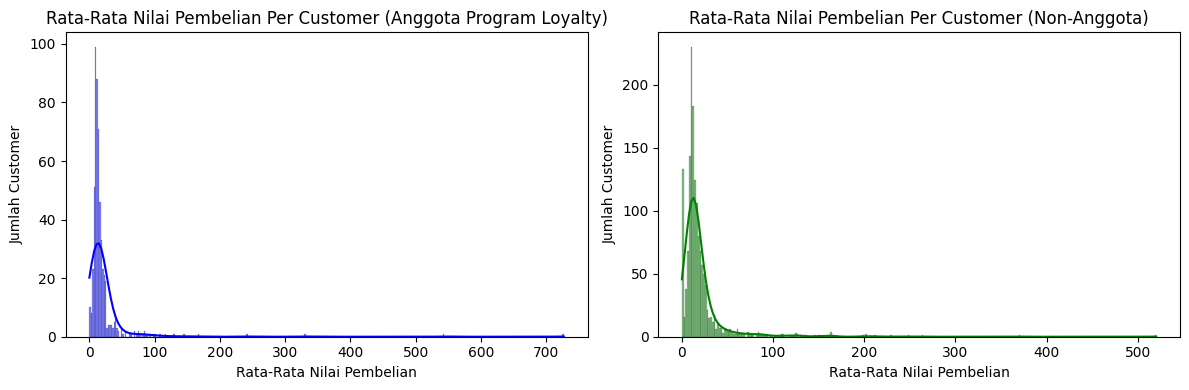

In [81]:
# Filter data untuk anggota program loyalitas
loyalty_members = purchase_by_customer[purchase_by_customer['loyalty_program'] == True]

# Filter data untuk non-anggota program loyalitas
non_loyalty_members = purchase_by_customer[purchase_by_customer['loyalty_program'] == False]

# Buat dua subplot untuk grafik histogram
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot histogram dan kepadatan untuk anggota program loyalitas (mengubah warna menjadi biru)
sns.histplot(data=loyalty_members, x='avg_revenue', kde=True, ax=axes[0], color='blue')
axes[0].set_title('Rata-Rata Nilai Pembelian Per Customer (Anggota Program Loyalty)')
axes[0].set_xlabel('Rata-Rata Nilai Pembelian')
axes[0].set_ylabel('Jumlah Customer')

# Plot histogram dan kepadatan untuk non-anggota program loyalitas (mengubah warna menjadi hijau)
sns.histplot(data=non_loyalty_members, x='avg_revenue', kde=True, ax=axes[1], color='green')
axes[1].set_title('Rata-Rata Nilai Pembelian Per Customer (Non-Anggota)')
axes[1].set_xlabel('Rata-Rata Nilai Pembelian')
axes[1].set_ylabel('Jumlah Customer')

plt.tight_layout()
plt.show()

**Kesimpulan :**

Meskipun rata-rata nilai pembelian menunjukkan nilai yang hampir serupa dari kedua kelompok pengguna, keberadaan program loyalitas masih memberikan manfaat dengan **meningkatkan variasi dalam nilai pembelian pelanggan yang menjadi anggota program, menciptakan peluang untuk penjualan produk dengan nilai yang lebih tinggi**

## **Analisis Preferensi Produk (Anggota VS Non-Anggota Program Loyalitas)**

In [82]:
# Membuat DataFrame baru yang hanya berisi data anggota program loyalitas
loyal_customers = loy_data[loy_data['loyalty_program'] == 1]

# Membuat DataFrame baru yang hanya berisi data bukan anggota program loyalitas
non_loyal_customers = loy_data[loy_data['loyalty_program'] == 0]

# Menghitung total transaksi oleh anggota program loyalitas
total_transactions_loyal = loyal_customers['purchaseid'].nunique()

# Menghitung total transaksi oleh bukan anggota program loyalitas
total_transactions_nonloyal = non_loyal_customers['purchaseid'].nunique()

# Menghitung jumlah transaksi per produk oleh anggota program loyalitas
loyal_product_transactions = loyal_customers.groupby('item_id')['purchaseid'].nunique().reset_index()
loyal_product_transactions.columns = ['product_id', 'jumlah_transaksi_loyal_cust']

# Menghitung jumlah transaksi per produk oleh bukan anggota program loyalitas
non_loyal_product_transactions = non_loyal_customers.groupby('item_id')['purchaseid'].nunique().reset_index()
non_loyal_product_transactions.columns = ['product_id', 'jumlah_transaksi_nonloyal_cust']

# Menggabungkan kedua DataFrame berdasarkan product_id
merged_product_transactions = pd.merge(loyal_product_transactions, non_loyal_product_transactions, on='product_id', how='outer')

# Mengisi nilai NaN dengan 0
merged_product_transactions.fillna(0, inplace=True)

# Menghitung persentase jumlah transaksi suatu produk terhadap total transaksi kelompok loyal
merged_product_transactions['Persentase_jumlah_transaksi_loyal_cust (%)'] = ((merged_product_transactions['jumlah_transaksi_loyal_cust'] / total_transactions_loyal) * 100).round(2)

# Menghitung persentase jumlah transaksi suatu produk terhadap total transaksi kelompok non-loyal
merged_product_transactions['Persentase_jumlah_transaksi_nonloyal_cust (%)'] = ((merged_product_transactions['jumlah_transaksi_nonloyal_cust'] / total_transactions_nonloyal) * 100).round(2)

# Tampilkan hasilnya
merged_product_transactions


,product_id,jumlah_transaksi_loyal_cust,jumlah_transaksi_nonloyal_cust,Persentase_jumlah_transaksi_loyal_cust (%),Persentase_jumlah_transaksi_nonloyal_cust (%)
0,10002,11.0,47.0,1.00,1.77
1,10120,3.0,2.0,0.27,0.08
2,10125,6.0,33.0,0.54,1.24
3,10133,8.0,34.0,0.72,1.28
4,10135,11.0,73.0,1.00,2.75
...,...,...,...,...,...
2766,90214R,0.0,10.0,0.00,0.38
2767,90214S,0.0,15.0,0.00,0.57
2768,DCGS0076,0.0,2.0,0.00,0.08
2769,DCGSSGIRL,0.0,1.0,0.00,0.04


**Deskripsi Tabel :**

* **product_id**: Kode produk yang mengidentifikasi setiap produk secara unik (terdapat 2.771 produk)

* **jumlah_transaksi_loyal_cust**: Menunjukkan jumlah transaksi yang dilakukan oleh pelanggan anggota program loyalitas untuk produk tertentu. Misalnya, produk dengan id 10002 memiliki 11 transaksi oleh pelanggan anggota program loyalitas.

* **jumlah_transaksi_nonloyal_cust**: Menunjukkan jumlah transaksi yang dilakukan oleh pelanggan non-anggota program loyalitas untuk produk tertentu. Sebagai contoh, produk dengan id 10002 memiliki 47 transaksi oleh pelanggan non-anggota program loyalitas

* **Persentase_jumlah_transaksi_loyal_cust (%)**: Menunjukkan persentase jumlah transaksi oleh pelanggan anggota program loyalitas terhadap jumlah total transaksi seluruh produk. Misalnya, produk dengan id 10002 memiliki persentase sekitar 1.00% dari keseluruhan total transaksi oleh pelanggan anggota program loyalitas

* **Persentase_jumlah_transaksi_nonloyal_cust (%)**: Menunjukkan persentase jumlah transaksi oleh pelanggan non-anggota program loyalitas terhadap jumlah total transaksi seluruh produk. Contohnya, produk denganid 10002 memiliki persentase sekitar 1.77% dari total transaksi oleh pelanggan non-anggota program loyalitas.

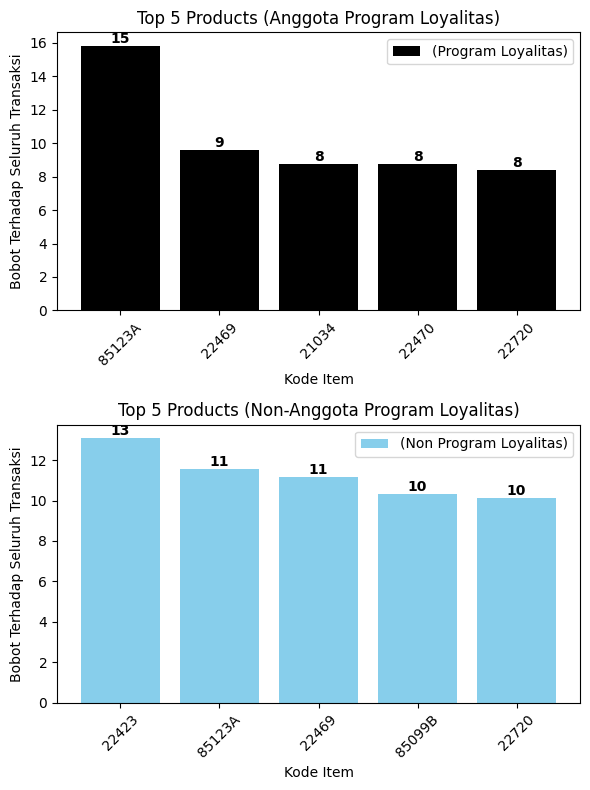

In [83]:
# Mengurutkan DataFrame produk berdasarkan frekuensi anggota program loyalitas
loyal_top_products = merged_product_transactions.sort_values(by='Persentase_jumlah_transaksi_loyal_cust (%)', ascending=False).head(5)

# Mengurutkan DataFrame produk berdasarkan frekuensi bukan anggota program loyalitas
non_loyal_top_products = merged_product_transactions.sort_values(by='Persentase_jumlah_transaksi_nonloyal_cust (%)', ascending=False).head(5)

# Membuat subplot dengan 2 baris dan 1 kolom
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

# Plot produk teratas anggota program loyalitas
axes[0].bar(loyal_top_products['product_id'].astype(str), loyal_top_products['Persentase_jumlah_transaksi_loyal_cust (%)'], color='black', label='(Program Loyalitas)')
axes[0].set_xlabel('Kode Item')
axes[0].set_ylabel('Bobot Terhadap Seluruh Transaksi')
axes[0].set_title('Top 5 Products (Anggota Program Loyalitas)')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Plot produk teratas bukan anggota program loyalitas
axes[1].bar(non_loyal_top_products['product_id'].astype(str), non_loyal_top_products['Persentase_jumlah_transaksi_nonloyal_cust (%)'], color='skyblue', label='(Non Program Loyalitas)')
axes[1].set_xlabel('Kode Item')
axes[1].set_ylabel('Bobot Terhadap Seluruh Transaksi')
axes[1].set_title('Top 5 Products (Non-Anggota Program Loyalitas)')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Menambahkan anotasi ke dalam bar
for ax in axes:
    for i, freq in enumerate(ax.patches):
        height = freq.get_height()
        ax.annotate(f"{int(height)}", (freq.get_x() + freq.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Mengatur jarak antara subplot
plt.tight_layout()

plt.show()

**Kesimpulan :**

1. Item barang dengan kode **85123A** adalah yang paling sering dibeli, baik oleh **Kelompok Anggota Program Loyalitas** maupun **Kelompok non-anggota program loyalitas**. Meskipun persentase pembelian barang ini lebih tinggi untuk **kelompok Anggota Program Loyalitas (15.84%)**, namun juga cukup tinggi dalam **Kelompok Non-Anggota Program Loyalitas (11.54%)**

2. Item barang dengan kode **22469** adalah yang **kedua paling sering dibeli oleh kedua kelompok**, dengan persentase yang mendekati satu sama lain (9.59% untuk anggota program loyalitas dan 11.17% untuk non-anggota program loyalitas)

3. Beberapa item barang **memiliki daya tarik yang sama baik bagi kedua kelompok pelanggan**. Namun, beberapa produk mungkin lebih menonjol dalam satu kelompok dibandingkan yang lain, seperti item barang dengan kode **21034** yang lebih menarik bagi **Kelompok Anggota Program Loyalitas**

# **Analisis Retensi Pelanggan**

   * Perilaku Pembelian dalam Cohort: Kami akan mengamati bagaimana perilaku pembelian pelanggan dalam setiap cohort berubah dari waktu ke waktu
   * Retensi Pelanggan: Kami akan menghitung tingkat retensi pelanggan dalam setiap cohort. Retensi pelanggan adalah persentase pelanggan dalam cohort yang tetap aktif dan terus berbelanja di toko Home World selama periode waktu yang ditentukan
   * Perbandingan Retensi Antara Anggota Program Loyalitas dan Non-Anggota: Kami juga akan membandingkan retensi pelanggan dalam cohort anggota program loyalitas dengan retensi pelanggan dalam cohort non-anggota. Ini akan membantu kami memahami apakah program loyalitas memiliki dampak positif terhadap retensi pelanggan

In [84]:
ret_data = loy_data.copy()
ret_data

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,price_per_one,revenue,date
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42,4.62,2016-12-10
1,541104,21873,29,2017-01-13 14:29:00,27611,0,Shop 0,0.42,12.18,2017-01-13
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,0.42,0.42,2017-01-07
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,0.42,0.84,2017-01-18
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,0.42,14.70,2017-01-19
...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,1.25,1.25,2016-12-23
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,1.65,8.25,2016-12-15
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,0.38,13.30,2016-12-14
105331,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,1.95,1.95,2016-12-23


## **Anggota Program Loyalitas**

In [85]:
# Mengambil data hanya untuk loyalty_program = 1
loyalty_program_data = ret_data[loy_data['loyalty_program'] == 1].copy()

# Membuat DataFrame baru
loyalty_program_dataframe = loyalty_program_data.copy()

# Membuat DataFrame baru
loyalty_program_dataframe

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,price_per_one,revenue,date
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,0.42,14.70,2017-01-19
7,543592,21873,5,2017-02-10 11:57:00,22922,1,Shop 15,0.42,2.10,2017-02-10
11,542608,21873,29,2017-01-30 13:51:00,22449,1,Shop 21,0.42,12.18,2017-01-30
17,539252,21873,35,2016-12-16 14:17:00,23423,1,Shop 18,0.42,14.70,2016-12-16
20,544930,21873,29,2017-02-24 18:26:00,23151,1,Shop 3,0.42,12.18,2017-02-24
...,...,...,...,...,...,...,...,...,...,...
105319,544160,79406,5,2017-02-16 12:49:00,22173,1,Shop 9,0.22,1.10,2017-02-16
105320,543610,71510,11,2017-02-10 14:30:00,22104,1,Shop 7,0.85,9.35,2017-02-10
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,1.25,1.25,2016-12-23
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,0.38,13.30,2016-12-14


In [86]:
# membuat dataframe first_act_1 yang mengidentifikasi aktifitas pertama untuk masing-masing pelanggan (program loyalitas)
first_act_1 = loyalty_program_dataframe.groupby('customerid')['date'].min()
first_act_1.name = 'firstdate_activity'
loyalty_program_dataframe = loyalty_program_dataframe.merge(first_act_1, on='customerid')

# menambah kolom firstweek_activity ke dataframe loyalty_program_dataframe
loyalty_program_dataframe['firstweek_activity']= loyalty_program_dataframe['firstdate_activity'].astype('datetime64[W]')

# menambahkan kolom week_activity
loyalty_program_dataframe['week_activity']= loyalty_program_dataframe['date'].astype('datetime64[W]')
loyalty_program_dataframe

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,price_per_one,revenue,date,firstdate_activity,firstweek_activity,week_activity
0,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,0.42,14.70,2017-01-19,2016-12-08,2016-12-08,2017-01-19
1,537775,22549,11,2016-12-08 12:41:00,23401,1,Shop 21,1.25,13.75,2016-12-08,2016-12-08,2016-12-08,2016-12-08
2,537775,22849,2,2016-12-08 12:41:00,23401,1,Shop 21,14.95,29.90,2016-12-08,2016-12-08,2016-12-08,2016-12-08
3,537775,21063,11,2016-12-08 12:41:00,23401,1,Shop 21,0.85,9.35,2016-12-08,2016-12-08,2016-12-08,2016-12-08
4,537775,22052,24,2016-12-08 12:41:00,23401,1,Shop 21,0.42,10.08,2016-12-08,2016-12-08,2016-12-08,2016-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22613,544441,21340,7,2017-02-20 10:29:00,22245,1,Shop 11,9.95,69.65,2017-02-20,2017-02-20,2017-02-16,2017-02-16
22614,544441,18097C,5,2017-02-20 10:29:00,22245,1,Shop 11,1.95,9.75,2017-02-20,2017-02-20,2017-02-16,2017-02-16
22615,541001,22827,1,2017-01-13 10:28:00,22179,1,Shop 26,145.00,145.00,2017-01-13,2017-01-13,2017-01-12,2017-01-12
22616,541426,22823,3,2017-01-18 08:44:00,23912,1,Shop 4,110.00,330.00,2017-01-18,2017-01-18,2017-01-12,2017-01-12


In [87]:
# menambahkan kolom cohort_lifetime
loyalty_program_dataframe['cohort_lifetime'] = loyalty_program_dataframe['week_activity'] - loyalty_program_dataframe['firstweek_activity']

# mengonversi kolom 'cohort_lifetime' menjadi satuan minggu
loyalty_program_dataframe['cohort_lifetime'] = loyalty_program_dataframe['cohort_lifetime']/np.timedelta64(1, 'W')

# mengubah nilai dalam kolom 'cohort_lifetime' menjadi bilangan integer
loyalty_program_dataframe['cohort_lifetime'] = loyalty_program_dataframe['cohort_lifetime'].round().astype('int')
loyalty_program_dataframe

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,price_per_one,revenue,date,firstdate_activity,firstweek_activity,week_activity,cohort_lifetime
0,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,0.42,14.70,2017-01-19,2016-12-08,2016-12-08,2017-01-19,6
1,537775,22549,11,2016-12-08 12:41:00,23401,1,Shop 21,1.25,13.75,2016-12-08,2016-12-08,2016-12-08,2016-12-08,0
2,537775,22849,2,2016-12-08 12:41:00,23401,1,Shop 21,14.95,29.90,2016-12-08,2016-12-08,2016-12-08,2016-12-08,0
3,537775,21063,11,2016-12-08 12:41:00,23401,1,Shop 21,0.85,9.35,2016-12-08,2016-12-08,2016-12-08,2016-12-08,0
4,537775,22052,24,2016-12-08 12:41:00,23401,1,Shop 21,0.42,10.08,2016-12-08,2016-12-08,2016-12-08,2016-12-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22613,544441,21340,7,2017-02-20 10:29:00,22245,1,Shop 11,9.95,69.65,2017-02-20,2017-02-20,2017-02-16,2017-02-16,0
22614,544441,18097C,5,2017-02-20 10:29:00,22245,1,Shop 11,1.95,9.75,2017-02-20,2017-02-20,2017-02-16,2017-02-16,0
22615,541001,22827,1,2017-01-13 10:28:00,22179,1,Shop 26,145.00,145.00,2017-01-13,2017-01-13,2017-01-12,2017-01-12,0
22616,541426,22823,3,2017-01-18 08:44:00,23912,1,Shop 4,110.00,330.00,2017-01-18,2017-01-18,2017-01-12,2017-01-12,0


In [88]:
# membuat dataframe dengan nama cohort
cohort = loyalty_program_dataframe.groupby(['firstweek_activity','cohort_lifetime']).agg({'customerid':'nunique'}).reset_index()

# melakukan filter pada DataFrame cohort dengan kondisi cohort_lifetime == 0, ambil kolom 'firstweek_activity','customerid'
count_user_awal = cohort[cohort['cohort_lifetime']==0][['firstweek_activity','customerid']].rename(columns={'customerid':'cohort_customer_count'})

# menggabungkan dataframe cohort dengan dataframe count_user_awal
cohort = cohort.merge(count_user_awal, on='firstweek_activity')

# mengganti nama kolom customerid menjadi active_customer
cohort = cohort.rename(columns={'customerid': 'active_customer'})
cohort.head()

,firstweek_activity,cohort_lifetime,active_customer,cohort_customer_count
0,2016-12-01,0,154,154
1,2016-12-01,1,30,154
2,2016-12-01,2,26,154
3,2016-12-01,3,2,154
4,2016-12-01,4,4,154


In [89]:
# menambahkan kolom retention
cohort['retention'] = (cohort['active_customer'] / cohort['cohort_customer_count']).round(2)
cohort.head()

,firstweek_activity,cohort_lifetime,active_customer,cohort_customer_count,retention
0,2016-12-01,0,154,154,1.00
1,2016-12-01,1,30,154,0.19
2,2016-12-01,2,26,154,0.17
3,2016-12-01,3,2,154,0.01
4,2016-12-01,4,4,154,0.03


In [90]:
# Membuat pivot untuk mengukur tingkat retensi
retention_pivot_1 = cohort.pivot_table(index='firstweek_activity', columns='cohort_lifetime', values='retention', aggfunc='sum')
retention_pivot_1 = retention_pivot_1.reset_index()
retention_pivot_1['firstweek_activity'] = retention_pivot_1['firstweek_activity'].dt.strftime('%Y-%m-%W')
retention_pivot_1 = retention_pivot_1.set_index('firstweek_activity')

# Menambahkan baris baru ke DataFrame retention_pivot_1 yang berisi nilai rata-rata dari setiap kolom
retention_pivot_1.loc['mean'] = retention_pivot_1.mean().round(2)

# Menampilkan DataFrame retention_pivot_1
retention_pivot_1.fillna('')


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
firstweek_activity,,,,,,,,,,,,,
2016-12-48,1.0,0.19,0.17,0.01,0.03,0.1,0.14,0.12,0.12,0.1,0.14,0.12,0.08
2016-12-49,1.0,0.14,0.03,0.03,0.04,0.07,0.12,0.1,0.1,0.1,0.12,0.05,
2016-12-50,1.0,,0.04,0.04,0.12,0.08,0.16,0.18,0.1,0.08,0.06,,
2016-12-51,1.0,,,,,,,,,,,,
2016-12-52,1.0,,,,,0.5,,0.5,,,,,
2017-01-01,1.0,0.05,0.08,0.08,0.12,0.08,0.02,0.08,,,,,
2017-01-02,1.0,0.04,0.04,0.04,0.12,0.12,0.12,,,,,,
2017-01-03,1.0,,,,0.08,0.04,,,,,,,
2017-01-04,1.0,0.02,0.05,0.07,0.07,,,,,,,,


In [91]:
# membuat dataset yang berisi rata-rata tingkat retensi pelanggan program loyalitas
mean_retention_loy = retention_pivot_1.loc['mean']
mean_retention_loy

cohort_lifetime
0     1.00
1     0.10
2     0.06
3     0.04
4     0.08
5     0.14
6     0.11
7     0.20
8     0.11
9     0.09
10    0.11
11    0.08
12    0.08
Name: mean, dtype: float64

## **Non-Anggota Program Loyalitas**

In [92]:
# Mengambil data hanya untuk loyalty_program = 1
non_loyalty_program_data = ret_data[ret_data['loyalty_program'] == 0].copy()

# Membuat DataFrame baru
non_loyalty_program_dataframe = non_loyalty_program_data.copy()

# Membuat DataFrame baru
non_loyalty_program_dataframe

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,price_per_one,revenue,date
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42,4.62,2016-12-10
1,541104,21873,29,2017-01-13 14:29:00,27611,0,Shop 0,0.42,12.18,2017-01-13
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,0.42,0.42,2017-01-07
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,0.42,0.84,2017-01-18
5,538843,21873,1,2016-12-14 13:18:00,21712,0,Shop 9,0.42,0.42,2016-12-14
...,...,...,...,...,...,...,...,...,...,...
105313,545054,16156L,24,2017-02-27 12:41:00,20151,0,Shop 1,0.42,10.08,2017-02-27
105317,544070,84859C,1,2017-02-15 14:19:00,21049,0,Shop 20,5.95,5.95,2017-02-15
105321,542216,16206B,4,2017-01-26 12:29:00,20590,0,Shop 10,1.25,5.00,2017-01-26
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,1.65,8.25,2016-12-15


In [93]:
# membuat dataframe first_act_1 yang mengidentifikasi aktifitas pertama untuk masing-masing pelanggan (program nonloyalitas)
first_act_0 = non_loyalty_program_dataframe.groupby('customerid')['date'].min()
first_act_0.name = 'firstdate_activity'
non_loyalty_program_dataframe = non_loyalty_program_dataframe.merge(first_act_0, on='customerid')

# menambah kolom firstweek_activity ke dataframe non_loyalty_program_dataframe
non_loyalty_program_dataframe['firstweek_activity']= non_loyalty_program_dataframe['firstdate_activity'].astype('datetime64[W]')

# menambahkan kolom week_activity
non_loyalty_program_dataframe['week_activity']= non_loyalty_program_dataframe['date'].astype('datetime64[W]')
non_loyalty_program_dataframe

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,price_per_one,revenue,date,firstdate_activity,firstweek_activity,week_activity
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42,4.62,2016-12-10,2016-12-01,2016-12-01,2016-12-08
1,545062,21873,29,2017-02-27 14:07:00,18427,0,Shop 18,0.42,12.18,2017-02-27,2016-12-01,2016-12-01,2017-02-23
2,537871,21873,5,2016-12-08 17:20:00,18427,0,Shop 4,0.42,2.10,2016-12-08,2016-12-01,2016-12-01,2016-12-08
3,538207,21239,5,2016-12-10 11:33:00,18427,0,Shop 29,0.72,3.60,2016-12-10,2016-12-01,2016-12-01,2016-12-08
4,538000,79321,11,2016-12-09 11:44:00,18427,0,Shop 15,0.00,0.00,2016-12-09,2016-12-01,2016-12-01,2016-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77660,536995,35951,56,2016-12-03 15:29:00,30513,0,Shop 0,0.00,0.00,2016-12-03,2016-12-03,2016-12-01,2016-12-01
77661,536554,84670,22,2016-12-01 14:35:00,29236,0,Shop 0,0.00,0.00,2016-12-01,2016-12-01,2016-12-01,2016-12-01
77662,538133,85018C,2,2016-12-09 15:56:00,46356,0,Shop 0,0.00,0.00,2016-12-09,2016-12-09,2016-12-08,2016-12-08
77663,540018,90112,1,2017-01-04 12:07:00,32173,0,Shop 0,0.00,0.00,2017-01-04,2017-01-04,2016-12-29,2016-12-29


In [94]:
# menambahkan kolom cohort_lifetime
non_loyalty_program_dataframe['cohort_lifetime'] = non_loyalty_program_dataframe['week_activity'] - non_loyalty_program_dataframe['firstweek_activity']

# mengonversi kolom 'cohort_lifetime' menjadi satuan minggu
non_loyalty_program_dataframe['cohort_lifetime'] = non_loyalty_program_dataframe['cohort_lifetime']/np.timedelta64(1, 'W')

# mengubah nilai dalam kolom 'cohort_lifetime' menjadi bilangan integer
non_loyalty_program_dataframe['cohort_lifetime'] = non_loyalty_program_dataframe['cohort_lifetime'].round().astype('int')
non_loyalty_program_dataframe

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,price_per_one,revenue,date,firstdate_activity,firstweek_activity,week_activity,cohort_lifetime
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42,4.62,2016-12-10,2016-12-01,2016-12-01,2016-12-08,1
1,545062,21873,29,2017-02-27 14:07:00,18427,0,Shop 18,0.42,12.18,2017-02-27,2016-12-01,2016-12-01,2017-02-23,12
2,537871,21873,5,2016-12-08 17:20:00,18427,0,Shop 4,0.42,2.10,2016-12-08,2016-12-01,2016-12-01,2016-12-08,1
3,538207,21239,5,2016-12-10 11:33:00,18427,0,Shop 29,0.72,3.60,2016-12-10,2016-12-01,2016-12-01,2016-12-08,1
4,538000,79321,11,2016-12-09 11:44:00,18427,0,Shop 15,0.00,0.00,2016-12-09,2016-12-01,2016-12-01,2016-12-08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77660,536995,35951,56,2016-12-03 15:29:00,30513,0,Shop 0,0.00,0.00,2016-12-03,2016-12-03,2016-12-01,2016-12-01,0
77661,536554,84670,22,2016-12-01 14:35:00,29236,0,Shop 0,0.00,0.00,2016-12-01,2016-12-01,2016-12-01,2016-12-01,0
77662,538133,85018C,2,2016-12-09 15:56:00,46356,0,Shop 0,0.00,0.00,2016-12-09,2016-12-09,2016-12-08,2016-12-08,0
77663,540018,90112,1,2017-01-04 12:07:00,32173,0,Shop 0,0.00,0.00,2017-01-04,2017-01-04,2016-12-29,2016-12-29,0


In [95]:
# membuat dataframe dengan nama cohort
cohort = non_loyalty_program_dataframe.groupby(['firstweek_activity','cohort_lifetime']).agg({'customerid':'nunique'}).reset_index()

# melakukan filter pada DataFrame cohort dengan kondisi cohort_lifetime == 0, ambil kolom 'firstweek_activity','customerid'
count_user_awal = cohort[cohort['cohort_lifetime']==0][['firstweek_activity','customerid']].rename(columns={'customerid':'cohort_customer_count'})

# menggabungkan dataframe cohort dengan dataframe count_user_awal
cohort = cohort.merge(count_user_awal, on='firstweek_activity')

# mengganti nama kolom customerid menjadi active_customer
cohort = cohort.rename(columns={'customerid': 'active_customer'})
cohort.head()

,firstweek_activity,cohort_lifetime,active_customer,cohort_customer_count
0,2016-12-01,0,324,324
1,2016-12-01,1,55,324
2,2016-12-01,2,51,324
3,2016-12-01,3,7,324
4,2016-12-01,4,9,324


In [96]:
# menambahkan kolom retention
cohort['retention'] = (cohort['active_customer'] / cohort['cohort_customer_count']).round(2)
cohort.head()

,firstweek_activity,cohort_lifetime,active_customer,cohort_customer_count,retention
0,2016-12-01,0,324,324,1.00
1,2016-12-01,1,55,324,0.17
2,2016-12-01,2,51,324,0.16
3,2016-12-01,3,7,324,0.02
4,2016-12-01,4,9,324,0.03


In [97]:
# Membuat pivot untuk mengukur tingkat retensi
retention_pivot_0 = cohort.pivot_table(index='firstweek_activity', columns='cohort_lifetime', values='retention', aggfunc='sum')
retention_pivot_0 = retention_pivot_0.reset_index()
retention_pivot_0['firstweek_activity'] = retention_pivot_0['firstweek_activity'].dt.strftime('%Y-%m-%W')
retention_pivot_0 = retention_pivot_0.set_index('firstweek_activity')

# Menambahkan baris baru ke DataFrame retention_pivot_0 yang berisi nilai rata-rata dari setiap kolom
retention_pivot_0.loc['mean'] = retention_pivot_0.mean().round(2)

# Menampilkan DataFrame retention_pivot_0
retention_pivot_0.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
firstweek_activity,,,,,,,,,,,,,
2016-12-48,1.0,0.17,0.16,0.02,0.03,0.18,0.12,0.09,0.12,0.11,0.11,0.1,0.1
2016-12-49,1.0,0.1,0.01,0.01,0.12,0.08,0.09,0.11,0.07,0.06,0.11,0.04,
2016-12-50,1.0,0.01,,0.04,0.04,0.05,0.06,0.04,0.03,0.04,0.05,,
2016-12-51,1.0,,,0.04,,0.04,,,,0.04,,,
2016-12-52,1.0,0.06,,,,0.06,,0.06,,,,,
2017-01-01,1.0,0.02,0.03,0.04,0.04,0.06,0.07,0.04,,,,,
2017-01-02,1.0,0.03,0.08,0.04,0.01,0.06,0.07,,,,,,
2017-01-03,1.0,0.01,0.05,0.05,0.03,0.04,,,,,,,
2017-01-04,1.0,0.02,0.03,0.01,0.04,,,,,,,,


In [98]:
# membuat series pandas yang berisi rata-rata tingkat retensi pelanggan non-anggota program loyalitas
mean_retention_nonloy = retention_pivot_0.loc['mean']
mean_retention_nonloy

cohort_lifetime
0     1.00
1     0.05
2     0.05
3     0.03
4     0.04
5     0.07
6     0.08
7     0.07
8     0.07
9     0.06
10    0.09
11    0.07
12    0.10
Name: mean, dtype: float64

In [99]:
mean_retention_nonloy.mean()

0.13692307692307695

In [100]:
mean_retention_loy.mean()

0.16923076923076927

## **Perbandingan Retensi Pelanggan : Anggota Program VS Non Anggota Program**

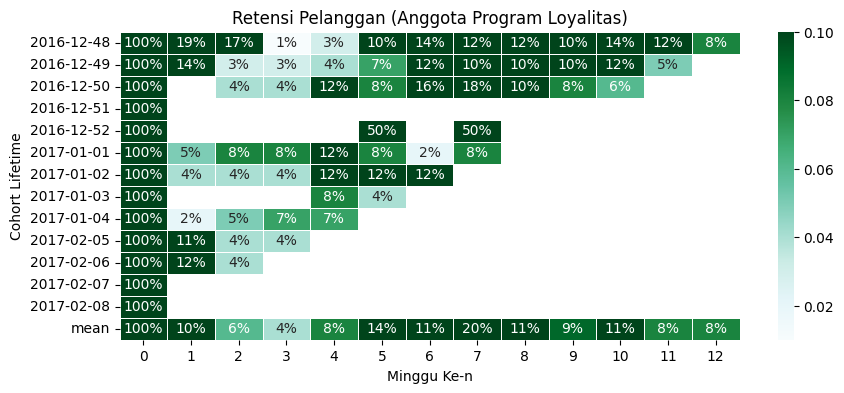

In [101]:
plt.figure(figsize=(10, 4))
plt.title('Retensi Pelanggan (Anggota Program Loyalitas)')
sns.heatmap(retention_pivot_1, annot=True, fmt=".0%", linewidths=.5, cmap = 'BuGn', vmax = 0.1 )
plt.ylabel('Cohort Lifetime')
plt.xlabel('Minggu Ke-n')
plt.show()

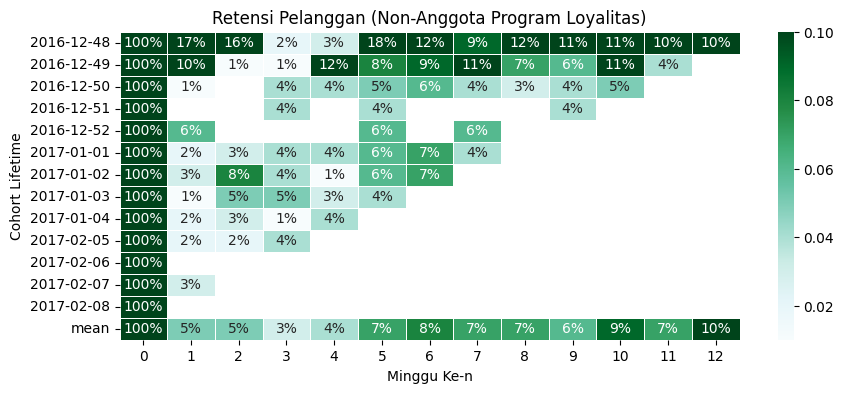

In [102]:
plt.figure(figsize=(10, 4))
plt.title('Retensi Pelanggan (Non-Anggota Program Loyalitas)')
sns.heatmap(retention_pivot_0, annot=True, fmt=".0%", linewidths=.5, cmap = 'BuGn', vmax = 0.1 )
plt.ylabel('Cohort Lifetime')
plt.xlabel('Minggu Ke-n')
plt.show()

**Kesimpulan :**

* Kohort dari kelompok **Anggota Program Loyalitas** menunjukkan retensi yang **lebih tinggi** dibandingkan kelompok **Non-Anggota Program Loyalitas** apabila dianalisa **selama minggu-minggu awal** setelah pelanggan memutuskan bergabung ke platform belanja. Ini bisa menjadi indikasi bahwa **program loyalitas** sedikit banyak berkontribusi dalam mempertahankan retensi pelanggan

* Pada **minggu ke-2** hingga **minggu ke-4**, terjadi **penurunan retensi** pada **kedua kelompok**. Namun, kelompok **Anggota Program Loyalitas** memiliki tingkat retensi yang sedikit lebih tinggi dibandingkan kelompok **Anggota Program Loyalitas** selama periode ini

Pada umumnya, meskipun kedua kelompok pelanggan mengalami penurunan tingkat retensi dari minggu ke minggu, namun kelompok **Anggota Program Loyalitas** memiliki **tingkat retensi yang lebih tinggi** dibandingkan dengan kelompok **Non-Anggota Program Loyalitas** selama periode waktu yang diamati.

# **Pengujian Hipotesis**

Dalam rangka menganalisis program loyalitas yang ditetapkan untuk meningkatkan penjualan tahunan dan mempertahankan pelanggan setia di toko "Home World," kami merumuskan beberapa hipotesis yang relevan. Berikut beberapa hipotesis yang kami ajukan:

1. **Hipotesis 1: Program Loyalitas Meningkatkan Rata-rata Jumlah Transaksi**
    * Hipotesis nol (H0): Rata-rata jumlah transaksi pelanggan anggota program loyalitas sama dengan rata-rata jumlah transaksi pelanggan non-anggota.
    * Hipotesis alternatif (H1): Rata-rata jumlah transaksi pelanggan anggota program loyalitas lebih tinggi daripada rata-rata jumlah transaksi pelanggan non-anggota.

2. **Hipotesis 2: Pelanggan Anggota Program Loyalitas Membeli Lebih Banyak Produk per Transaksi**
    * Hipotesis nol (H0): Rata-rata jumlah item per transaksi pelanggan anggota program loyalitas sama dengan rata-rata jumlah item per transaksi pelanggan non-anggota.
    * Hipotesis alternatif (H1): Rata-rata jumlah item per transaksi pelanggan anggota program loyalitas lebih tinggi daripada rata-rata jumlah item per transaksi pelanggan non-anggota.

3. **Hipotesis 3: Program Loyalitas Meningkatkan Rata-Rata Nilai Pembelian**
    * Hipotesis nol (H0): Rata-rata nilai pembelian pelanggan anggota program loyalitas sama dengan rata-rata nilai pembelian pelanggan non-anggota.
    * Hipotesis alternatif (H1): Rata-rata nilai pembelian pelanggan anggota program loyalitas lebih tinggi daripada rata-rata nilai pembelian pelanggan non-anggota.

4. **Hipotesis 4: Anggota Program Loyalitas Mempunyai Tingkat Retensi yang Lebih Tinggi**
    * Hipotesis nol (H0): Tingkat retensi pelanggan dalam cohort anggota program loyalitas sama dengan tingkat retensi pelanggan dalam cohort non-anggota.
    * Hipotesis alternatif (H1): Tingkat retensi pelanggan dalam cohort anggota program loyalitas lebih tinggi daripada tingkat retensi pelanggan dalam cohort non-anggota.

5. **Hipotesis 5: Program Loyalitas Berdampak Positif terhadap Pembelian Produk Tertentu**
    * Hipotesis nol (H0): Tidak ada perbedaan signifikan dalam preferensi produk antara anggota program loyalitas dan pelanggan non-anggota.
    * Hipotesis alternatif (H1): Anggota program loyalitas lebih cenderung membeli produk tertentu secara signifikan dibandingkan dengan pelanggan non-anggota.

## **Hipotesis 1 : Program Loyalitas Meningkatkan Jumlah Transaksi Per Customer**

In [103]:
# memuat dataset
transact_by_customer

,customerid,loyalty_program,total_transaksi
0,18026,0,2
1,18027,0,2
2,18029,0,1
3,18031,0,1
4,18035,0,1
...,...,...,...
2110,47766,0,1
2111,47853,0,1
2112,47855,0,1
2113,47874,0,1


In [104]:
# Memilih kolom 'total_transaksi' dari kelompok anggota program loyalitas
loy_program = transact_by_customer[transact_by_customer['loyalty_program'] == 1]['total_transaksi']

# Memilih kolom 'total_transaksi' dari kelompok non-anggota program loyalitas
nonloy_program = transact_by_customer[transact_by_customer['loyalty_program'] == 0]['total_transaksi']

In [105]:
# Uji hipotesis
alpha = 0.05 # atur tingkat signifikansi statistik kritis (critical value)

stat, p_value = st.mannwhitneyu(loy_program, nonloy_program)

# Menampilkan hasil uji statistik
print("Hasil Uji Mann-Whitney U:")
print("Statistik Uji =", stat)
print("Nilai p =", p_value.round(2))
print()

if p_value < alpha:
    print("Tolak H0 : Terdapat Perbedaan Jumlah Transaksi Dari Kelompok Anggota Program Loyalitas VS Kelompok Non-Anggota Program Loyalitas")
else:
    print("Tidak dapat menolak H0 : Tidak Terdapat Perbedaan Jumlah Transaksi Dari Kedua Kelompok Program")

print("Perbedaan Relatif antara 2 kelompok sebesar: {0:.3f}".format(loy_program.mean() / nonloy_program.mean() - 1))

Hasil Uji Mann-Whitney U:
Statistik Uji = 507348.0
Nilai p = 0.0

Tolak H0 : Terdapat Perbedaan Jumlah Transaksi Dari Kelompok Anggota Program Loyalitas VS Kelompok Non-Anggota Program Loyalitas
Perbedaan Relatif antara 2 kelompok sebesar: 0.163


**Kesimpulan :**

* Secara statistik **terdapat perbedaan** dalam jumlah transaksi per customer antara kedua kelompok pengguna
* Pengguna dari kelompok **Anggota Program Loyalitas** melakukan sekitar **16.3% lebih banyak transaksi** dibandingkan pengguna dari kelompok **Non-Anggota Program**
* **Terbukti bahwa Program Loyalitas mampu meningkatkan jumlah transaksi per customer sebesar 16.3%**

## **Hipotesis 2: Program Loyalitas Meningkatkan Jumlah Item Yang Dibeli Per Transaksi Dari Setiap Customer**

In [106]:
# memuat dataset
quantity_by_customer

,customerid,loyalty_program,average_quantity
0,18026,0,9
1,18027,0,71
2,18029,0,11
3,18031,0,3
4,18035,0,23
...,...,...,...
1657,23936,1,4
1658,23938,1,23
1659,23939,1,11
1660,23948,1,5


In [107]:
# Memilih kolom 'average_quantity' dari kelompok anggota program loyalitas
loy_program_item = quantity_by_customer[quantity_by_customer['loyalty_program'] == 1]['average_quantity']

# Memilih kolom 'average_quantity' dari kelompok non-anggota program loyalitas
nonloy_program_item = quantity_by_customer[quantity_by_customer['loyalty_program'] == 0]['average_quantity']

In [108]:
# Uji hipotesis
alpha = 0.05 # atur tingkat signifikansi statistik kritis (critical value)

stat, p_value = st.mannwhitneyu(loy_program_item, nonloy_program_item)

# Menampilkan hasil uji statistik
print("Hasil Uji Mann-Whitney U:")
print("Statistik Uji =", stat)
print("Nilai p =", p_value.round(2))
print()

if p_value < alpha:
    print("Tolak H0 : Terdapat Perbedaan Jumlah Item Per Transaksi Dari Kelompok Anggota Program Loyalitas VS Kelompok Non-Anggota Program Loyalitas")
else:
    print("Tidak dapat menolak H0 : Tidak Terdapat Perbedaan Jumlah Item Per Transaksi Dari Kedua Kelompok Program")

print("Perbedaan Relatif antara 2 kelompok sebesar: {0:.3f}".format(loy_program_item.mean() / nonloy_program_item.mean() - 1))

Hasil Uji Mann-Whitney U:
Statistik Uji = 409672.5
Nilai p = 0.04

Tolak H0 : Terdapat Perbedaan Jumlah Item Per Transaksi Dari Kelompok Anggota Program Loyalitas VS Kelompok Non-Anggota Program Loyalitas
Perbedaan Relatif antara 2 kelompok sebesar: -0.089


**Kesimpulan :**

* Secara statistik **terdapat perbedaan** dalam hal jumlah item yang dibeli per transaksi antara kedua kelompok pengguna
* Pengguna dari kelompok **Anggota Program Loyalitas** ternyata cenderung melakukan pembelian dengan jumlah item yang **lebih sedikit** dibandingkan **Kelompok Pelanggan Non-Anggota Program**
* **Ternyata, Program Loyalitas tidak berhasil meningkatkan jumlah item yang dibeli per pengguna. Sebaliknya, terdapat fakta bahwa jumlah item yang dibeli per transaksi oleh pengguna anggota program loyalitas lebih rendah sekitar 8.9% dibandingkan dengan jumlah item yang dibeli oleh pelanggan non-anggota program**

## **Hipotesis 3: Program Loyalitas Meningkatkan Rata-Rata Nilai Pembelian**

In [109]:
# memuat dataset
purchase_by_customer

,customerid,loyalty_program,avg_revenue
0,18026,0,12.518500
1,18027,0,30.887059
2,18029,0,11.432941
3,18031,0,10.138000
4,18035,0,41.336667
...,...,...,...
1657,23936,1,14.281875
1658,23938,1,4.292857
1659,23939,1,10.879459
1660,23948,1,11.114286


In [110]:
# Memilih kolom 'avg_revenue' dari kelompok anggota program loyalitas
loy_program_purchase = purchase_by_customer[purchase_by_customer['loyalty_program'] == 1]['avg_revenue']

# Memilih kolom 'avg_revenue' dari kelompok non-anggota program loyalitas
nonloy_program_purchase = purchase_by_customer[purchase_by_customer['loyalty_program'] == 0]['avg_revenue']

In [111]:
# Uji hipotesis
alpha = 0.05 # atur tingkat signifikansi statistik kritis (critical value)

stat, p_value = st.mannwhitneyu(loy_program_purchase , nonloy_program_purchase)

# Menampilkan hasil uji statistik
print("Hasil Uji Mann-Whitney U:")
print("Statistik Uji =", stat)
print("Nilai p =", p_value.round(2))
print()

if p_value < alpha:
    print("Tolak H0 : Terdapat Perbedaan Rata-Rata Nilai Pembelian Dari Kelompok Anggota Program Loyalitas VS Kelompok Non-Anggota Program Loyalitas")
else:
    print("Tidak dapat menolak H0 : Tidak Terdapat Perbedaan Rata-Rata Nilai Pembelian Dari Kedua Kelompok Program")

print("Perbedaan Relatif antara 2 kelompok sebesar: {0:.3f}".format(loy_program_purchase.mean() / nonloy_program_purchase.mean() - 1))

Hasil Uji Mann-Whitney U:
Statistik Uji = 435465.5
Nilai p = 0.93

Tidak dapat menolak H0 : Tidak Terdapat Perbedaan Rata-Rata Nilai Pembelian Dari Kedua Kelompok Program
Perbedaan Relatif antara 2 kelompok sebesar: 0.055


**Kesimpulan :**

* Secara statistik **tidak ada perbedaan signifikan** dalam hal rata-rata nilai pembelian antara kedua kelompok pengguna
* **Program loyalitas tidak terbukti mampu meningkatkan rata-rata nilai pembelian per pengguna. Kami mengibaratkan, misalnya apabila selama ini Program Loyalitas memberikan kepada anggotanya sejumlah keuntungan tambahan, namun hal ini tidak berdampak signifikan pada rata-rata nilai pembelian pengguna. Sebagai hasilnya, perbedaan relatif antara kedua kelompok hanya sekitar 5.5%, yang masih relatif kecil dibandingkan investasi yang telah dikeluarkan perusahaan dalam bentuk promo, diskon dan hadiah**

## **Hipotesis 4: Program Loyalitas Mampu Mempertahankan Tingkat Retensi Pengguna**

In [112]:
# Uji hipotesis
alpha = 0.05 # atur tingkat signifikansi statistik kritis (critical value)

stat, p_value = st.mannwhitneyu(mean_retention_loy , mean_retention_nonloy)

# Menampilkan hasil uji statistik
print("Hasil Uji Mann-Whitney U:")
print("Statistik Uji =", stat)
print("Nilai p =", p_value.round(2))
print()
if p_value < alpha:
    print("Tolak H0 : Terdapat Perbedaan Rata-Rata Tingkat Retensi Pelanggan Dari Kelompok Anggota Program Loyalitas VS Kelompok Non-Anggota Program Loyalitas")
else:
    print("Tidak dapat menolak H0 : Tidak Terdapat Perbedaan Rata-Rata Tingkat Retensi Pelanggan Dari Kedua Kelompok Program")
print("Perbedaan Relatif antara 2 kelompok sebesar: {0:.3f}".format(mean_retention_loy.mean() / mean_retention_nonloy.mean() - 1))

Hasil Uji Mann-Whitney U:
Statistik Uji = 129.0
Nilai p = 0.02

Tolak H0 : Terdapat Perbedaan Rata-Rata Tingkat Retensi Pelanggan Dari Kelompok Anggota Program Loyalitas VS Kelompok Non-Anggota Program Loyalitas
Perbedaan Relatif antara 2 kelompok sebesar: 0.236


**Kesimpulan :**

* Secara statistik **terdapat perbedaan** dalam hal rata-rata tingkat retensi pelanggan antara pengguna dari kelompok **Anggota Program Loyalitas** VS **Non-Anggota Program Loyalitas**

* **Program Loyalitas terbukti efektif dalam mempertahankan keterlibatan pengguna di aplikasi. Jumlah pengguna yang mampu dipertahankan dalam program ini sebesar 23.6% lebih tinggi dibandingkan pengguna non-anggota program**

## **Hipotesis 5: Program Loyalitas Mendorong Pembelian Produk-Produk Dengan Harga Tinggi**

In [113]:
# memuat dataset
spend_money_customer

,customerid,loyalty_program,harga_produk_per_customer
0,18026,0,1.90
1,18027,0,0.51
2,18029,0,1.08
3,18031,0,3.10
4,18035,0,2.13
...,...,...,...
1657,23936,1,2.88
1658,23938,1,0.42
1659,23939,1,1.44
1660,23948,1,1.14


In [114]:
# Memilih kolom 'harga_produk_per_customer' dari kelompok anggota program loyalitas
loy_program_price = spend_money_customer[spend_money_customer['loyalty_program'] == 1]['harga_produk_per_customer']

# Memilih kolom 'harga_produk_per_customer' dari kelompok non-anggota program loyalitas
nonloy_program_price = spend_money_customer[spend_money_customer['loyalty_program'] == 0]['harga_produk_per_customer']

In [115]:
# Uji hipotesis
alpha = 0.05 # atur tingkat signifikansi statistik kritis (critical value)

stat, p_value = st.mannwhitneyu(loy_program_price , nonloy_program_price)

# Menampilkan hasil uji statistik
print("Hasil Uji Mann-Whitney U:")
print("Statistik Uji =", stat)
print("Nilai p =", p_value.round(2))
print()

if p_value < alpha:
    print("Tolak H0 : Terdapat Perbedaan Rata-Rata Harga Per Item Produk Yang Dibeli Antara Kelompok Anggota Program Loyalitas VS Kelompok Non-Anggota Program Loyalitas")
else:
    print("Tidak dapat menolak H0 : Tidak Terdapat Perbedaan Rata-Rata Harga Per Item Produk Yang Dibeli antara Kedua Kelompok Program")

print("Perbedaan Relatif antara 2 kelompok sebesar: {0:.3f}".format(loy_program_price.mean() / nonloy_program_price.mean() - 1))

Hasil Uji Mann-Whitney U:
Statistik Uji = 464577.0
Nilai p = 0.01

Tolak H0 : Terdapat Perbedaan Rata-Rata Harga Per Item Produk Yang Dibeli Antara Kelompok Anggota Program Loyalitas VS Kelompok Non-Anggota Program Loyalitas
Perbedaan Relatif antara 2 kelompok sebesar: 0.117


**Kesimpulan :**

* Secara statistik **terdapat perbedaan** dalam hal rata-rata harga per item produk yang dibeli antara pengguna dari kelompok **Anggota Program Loyalitas** VS **Non-Anggota Program Loyalitas**.

* **Program Loyalitas terbukti mampu mendorong pengguna untuk membeli produk-produk dengan harga yang lebih tinggi. Kelompok program loyalitas cederung membeli produk-produk dengan persentase 11.7% lebih mahal dibanding kelompok non-anggota program loyalitas**

## **Hipotesis 6: Program Loyalitas Berdampak Positif terhadap Pembelian Produk Tertentu**

In [116]:
# identifikasi jumlah item unik
print("Jumlah Item (Unik) Yang Tersedia Di Platform Belanja Online Sebanyak :", loy_data['item_id'].nunique(), 'Item')

Jumlah Item (Unik) Yang Tersedia Di Platform Belanja Online Sebanyak : 2771 Item


In [117]:
# Memuat dataset
merged_product_transactions

,product_id,jumlah_transaksi_loyal_cust,jumlah_transaksi_nonloyal_cust,Persentase_jumlah_transaksi_loyal_cust (%),Persentase_jumlah_transaksi_nonloyal_cust (%)
0,10002,11.0,47.0,1.00,1.77
1,10120,3.0,2.0,0.27,0.08
2,10125,6.0,33.0,0.54,1.24
3,10133,8.0,34.0,0.72,1.28
4,10135,11.0,73.0,1.00,2.75
...,...,...,...,...,...
2766,90214R,0.0,10.0,0.00,0.38
2767,90214S,0.0,15.0,0.00,0.57
2768,DCGS0076,0.0,2.0,0.00,0.08
2769,DCGSSGIRL,0.0,1.0,0.00,0.04


In [118]:
# Uji Hipotesis
anggota_program_loyalitas_percent = merged_product_transactions['Persentase_jumlah_transaksi_loyal_cust (%)']
non_anggota_program_loyalitas_percent = merged_product_transactions['Persentase_jumlah_transaksi_nonloyal_cust (%)']

alpha = 0.05 # atur tingkat signifikansi statistik kritis (critical value)

stat, p_value = st.mannwhitneyu(anggota_program_loyalitas_percent , non_anggota_program_loyalitas_percent)

# Menampilkan hasil uji statistik
print("Hasil Uji Mann-Whitney U:")
print("Statistik Uji =", stat)
print("Nilai p =", p_value.round(2))

if p_value < alpha:
    print("Tolak H0 : Terdapat Perbedaan Preferensi Produk Yang Dibeli antara Kelompok Anggota Program Loyalitas VS Kelompok Non-Anggota Program Loyalitas")
else:
    print("Tidak dapat menolak H0 : Tidak Terdapat Perbedaan Preferensi Produk Yang Dibeli Dari Kedua Kelompok Program")

Hasil Uji Mann-Whitney U:
Statistik Uji = 2955313.5
Nilai p = 0.0
Tolak H0 : Terdapat Perbedaan Preferensi Produk Yang Dibeli antara Kelompok Anggota Program Loyalitas VS Kelompok Non-Anggota Program Loyalitas


**Kesimpulan :**

Terdapat perbedaan preferensi produk yang dibeli antara pengguna dari kelompok **Anggota Program Loyalitas** VS **Non-Anggota Program Loyalitas**. Hasil ini menunjukkan bahwa program loyalitas dapat memiliki pengaruh yang nyata terhadap preferensi produk yang dipilih oleh pelanggan

# **KESIMPULAN UMUM**

Berdasarkan analisis yang telah dilakukan terhadap data pengguna dari perusahaan "Home World," kita dapat menyusun kesimpulan umum yang komprehensif mengenai program loyalitas dan dampaknya pada perilaku pelanggan.

Pada periode observasi yang dimulai pada **Desember 2016 hingga Februari 2017**, perusahaan "Home World" berhasil mengumpulkan data dari **2.115 pengguna** dan **3.756 transaksi**. Terdapat perbedaan yang signifikan dalam partisipasi pelanggan pada program loyalitas. **Sebanyak 26.4% pelanggan bergabung dalam program**, sementara mayoritas, yaitu **72.6%, memilih untuk tidak menjadi anggota**. Hal ini menunjukkan bahwa program tersebut mungkin belum sepenuhnya efektif dalam menarik minat pelanggan untuk bergabung.

Berdasarkan analisis transaksi, kami menemukan bahwa pengguna yang merupakan **anggota program loyalitas melakukan lebih banyak transaksi**, dengan peningkatan sebesar **16.3% dibandingkan dengan pengguna non-anggota program**. Meskipun **jumlah item per transaksi sedikit lebih rendah untuk anggota program**, program loyalitas memberikan **keuntungan dengan meningkatkan variasi dalam nilai pembelian, termasuk pembelian produk dengan harga yang lebih tinggi.**

**Rata-rata pendapatan per pengguna dalam program loyalitas juga sedikit lebih tinggi**, meskipun dengan deviasi yang lebih tinggi, menunjukkan adanya pelanggan dengan nilai pembelian yang sangat tinggi di dalam kelompok ini.

**Analisis preferensi produk menunjukkan bahwa beberapa item populer memiliki daya tarik yang sama baik bagi anggota maupun non-anggota program loyalitas, tetapi ada juga produk yang lebih menonjol dalam satu kelompok dibandingkan yang lain**

Dalam hal **retensi pelanggan, kelompok anggota program loyalitas menunjukkan tingkat retensi yang lebih tinggi** selama minggu-minggu awal setelah bergabung. Ini menunjukkan bahwa **program loyalitas berkontribusi dalam mempertahankan pelanggan**.

Meskipun **program loyalitas tidak secara signifikan meningkatkan rata-rata nilai pembelian per pengguna**, dampak positif terlihat dalam mendorong pembelian produk dengan harga lebih tinggi, yang dapat meningkatkan pendapatan per transaksi.

Secara keseluruhan, meskipun sebagian besar pelanggan belum bergabung dalam program loyalitas yang ditawarkan perusahaan, namun **program loyalitas memberikan manfaat dengan meningkatkan jumlah transaksi, retensi pelanggan, dan pembelian produk dengan harga tinggi**. Namun, perusahaan perlu mempertimbangkan upaya lebih lanjut dalam mempromosikan program loyalitasnya untuk menarik lebih banyak pelanggan. Dengan demikian, perusahaan dapat terus mengoptimalkan strategi dan manfaat yang ditawarkan dalam program loyalitas untuk pertumbuhan yang lebih besar lagi.

# **DASHSBOARD**

**Link Dashboard :** <http://bit.ly/HOME_WORLD_SALES_DASHBOARD>

# **PRESENTASI**

**Link PPT :** <https://bit.ly/PPT_ANALISIS_EFEKTIFITAS_PROGRAM_LOYALITAS>

# **Appendix**

In [119]:
# # Simpan dataframe yang telah diubah
# df_joined.to_csv('DATA Home World CLEAN.csv', index=False)

# # Selanjutnya, jika Anda ingin mengunduh dataframe yang telah diisi, Anda dapat menggunakan kode berikut:
# from google.colab import files
# files.download('DATA Home World CLEAN.csv')

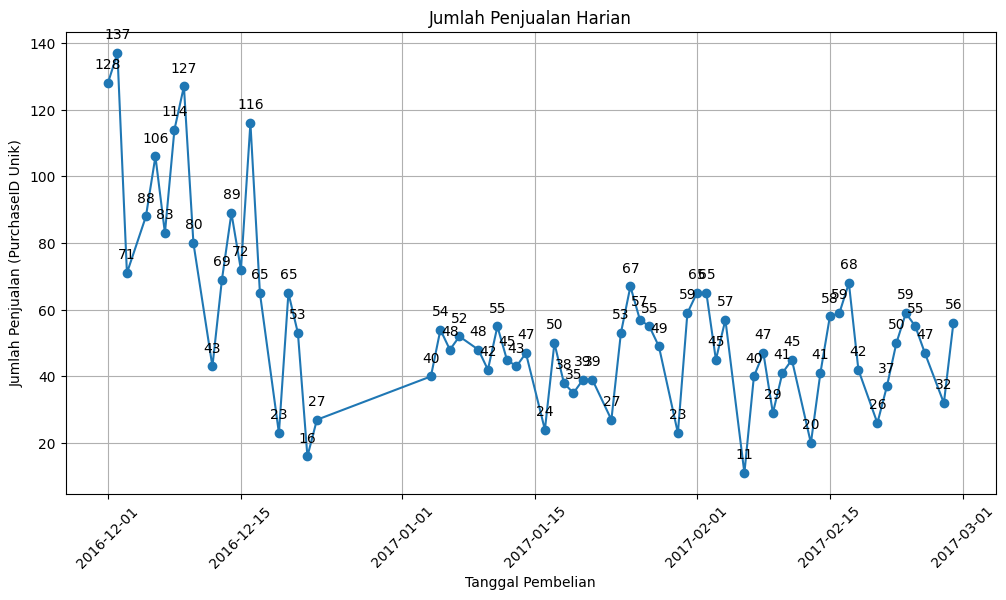

In [120]:
# Mengelompokkan data per tanggal dan menghitung jumlah purchaseid unik
daily_sales = df_joined.groupby(df_joined['purchasedate'].dt.date)['purchaseid'].nunique()

# Membuat grafik line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.xlabel('Tanggal Pembelian')
plt.ylabel('Jumlah Penjualan (PurchaseID Unik)')
plt.title('Jumlah Penjualan Harian')
plt.xticks(rotation=45)  # Mengatur label tanggal agar lebih mudah dibaca
plt.grid(True)

# Menambahkan anotasi (label) pada setiap titik
for date, sales in zip(daily_sales.index, daily_sales.values):
    plt.annotate(f'{sales}', (date, sales), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


In [121]:
# Mengambil bulan dari kolom 'purchasedate' dan membuat kolom baru 'bulan'
df_joined['bulan'] = df_joined['purchasedate'].dt.strftime('%Y-%m')

# Menghitung jumlah transaksi unik per bulan
total_transaksi_per_bulan = df_joined.groupby('bulan')['purchaseid'].nunique().reset_index()
total_transaksi_per_bulan

,bulan,purchaseid
0,2016-12,1572
1,2017-01,1089
2,2017-02,1095


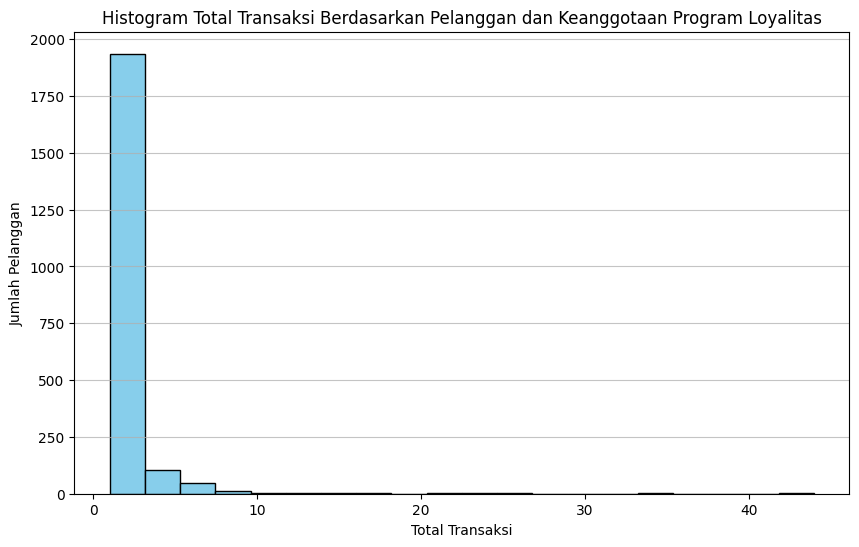

In [122]:
import matplotlib.pyplot as plt

# Membuat histogram
plt.figure(figsize=(10, 6))
plt.hist(transact_by_customer['total_transaksi'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram Total Transaksi Berdasarkan Pelanggan dan Keanggotaan Program Loyalitas')
plt.xlabel('Total Transaksi')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.75)

# Menampilkan histogram
plt.show()


In [123]:
loy_data['revenue'].sum()

1605609.61

In [124]:
df_week = df_joined.copy()
df_week

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length,revenue,date,bulan
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,5,4.62,2016-12-10,2016-12
1,541104,21873,29,2017-01-13 14:29:00,27611,0,Shop 0,21873,0.42,5,12.18,2017-01-13,2017-01
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,21873,0.42,5,0.42,2017-01-07,2017-01
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,21873,0.42,5,0.84,2017-01-18,2017-01
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,5,14.70,2017-01-19,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105322,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,16206B,1.25,6,1.25,2016-12-23,2016-12
105327,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65,5,8.25,2016-12-15,2016-12
105330,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38,6,13.30,2016-12-14,2016-12
105331,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95,6,1.95,2016-12-23,2016-12


In [125]:
# Mengubah format kolom "date" menjadi "%y-%m-%w"
df_week['date'] = pd.to_datetime(df_week['date'])
df_week['formatted_date'] = df_week['date'].dt.strftime('%Y-%m-%W')
df_week.head(50)

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,productid,price_per_one,item_id_length,revenue,date,bulan,formatted_date
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,5,4.62,2016-12-10,2016-12,2016-12-49
1,541104,21873,29,2017-01-13 14:29:00,27611,0,Shop 0,21873,0.42,5,12.18,2017-01-13,2017-01,2017-01-02
2,540418,21873,1,2017-01-07 11:04:00,24782,0,Shop 0,21873,0.42,5,0.42,2017-01-07,2017-01,2017-01-01
3,541516,21873,2,2017-01-18 17:34:00,32975,0,Shop 0,21873,0.42,5,0.84,2017-01-18,2017-01,2017-01-03
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,5,14.70,2017-01-19,2017-01,2017-01-03
5,538843,21873,1,2016-12-14 13:18:00,21712,0,Shop 9,21873,0.42,5,0.42,2016-12-14,2016-12,2016-12-50
6,540838,21873,11,2017-01-11 15:13:00,19541,0,Shop 4,21873,0.42,5,4.62,2017-01-11,2017-01,2017-01-02
7,543592,21873,5,2017-02-10 11:57:00,22922,1,Shop 15,21873,0.42,5,2.10,2017-02-10,2017-02,2017-02-06
8,544651,21873,71,2017-02-22 12:51:00,19373,0,Shop 17,21873,0.42,5,29.82,2017-02-22,2017-02,2017-02-08
9,545062,21873,29,2017-02-27 14:07:00,18427,0,Shop 18,21873,0.42,5,12.18,2017-02-27,2017-02,2017-02-09


In [126]:
# # Simpan dataframe yang telah diubah
# df_week.to_csv('DATA Home World CLEAN.csv', index=False)

# # Selanjutnya, jika Anda ingin mengunduh dataframe yang telah diisi, Anda dapat menggunakan kode berikut:
# from google.colab import files
# files.download('DATA Home World CLEAN.csv')

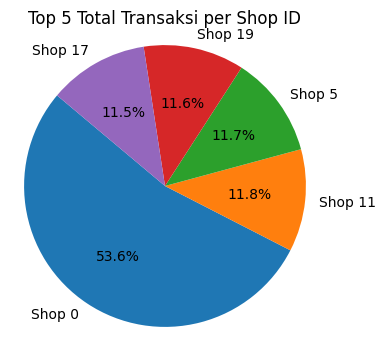

In [127]:
# Menghitung jumlah purchaseid unik per shopid
purchaseid_per_shopid = df_joined.groupby('shopid')['purchaseid'].nunique().reset_index()

# Mengurutkan shopid berdasarkan jumlah purchaseid unik secara descending
purchaseid_per_shopid = purchaseid_per_shopid.sort_values(by='purchaseid', ascending=False).head(5)

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(purchaseid_per_shopid['purchaseid'], labels=purchaseid_per_shopid['shopid'], autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Membuat lingkaran pie chart terlihat lebih bulat
plt.title('Top 5 Total Transaksi per Shop ID')
plt.show()


In [128]:
# Menggabungkan data berdasarkan 'customerid' dan menghitung total transaksi dan total pendapatan
customer_data = df_joined.groupby('customerid').agg({'purchaseid': 'nunique', 'revenue': 'sum'}).reset_index()

# Memberikan nama kolom baru
customer_data.columns = ['customerid', 'total_transactions', 'total_revenue']

# Menampilkan hasil
customer_data

,customerid,total_transactions,total_revenue
0,18026,2,751.11
1,18027,2,525.08
2,18029,1,194.36
3,18031,1,152.07
4,18035,1,1488.12
...,...,...,...
2110,47766,1,9.35
2111,47853,1,2551.86
2112,47855,1,5889.98
2113,47874,1,6609.08


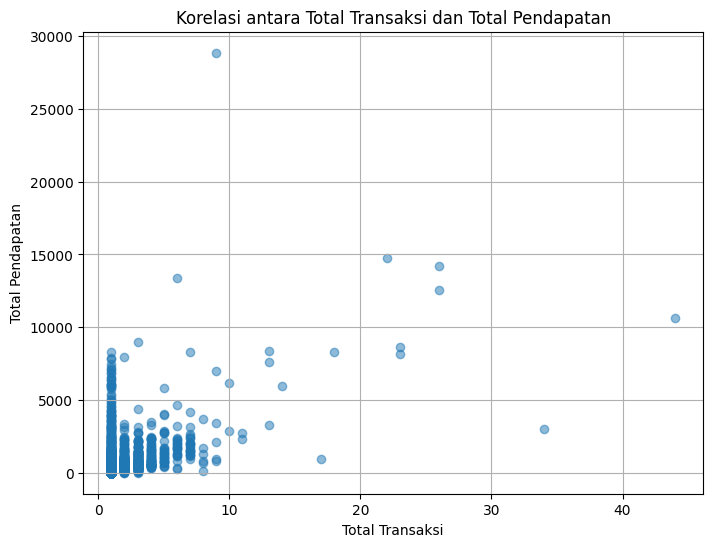

In [129]:
# Memvisualisasikan korelasi antara total_transactions dan total_revenue
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['total_transactions'], customer_data['total_revenue'], alpha=0.5)
plt.title('Korelasi antara Total Transaksi dan Total Pendapatan')
plt.xlabel('Total Transaksi')
plt.ylabel('Total Pendapatan')
plt.grid(True)

# Menampilkan plot
plt.show()


In [130]:
# Menghitung total revenue per shop
total_revenue_per_shop = df_joined.groupby('shopid')['revenue'].sum().reset_index()

# Menampilkan hasilnya
total_revenue_per_shop


,shopid,revenue
0,Shop 0,541929.34
1,Shop 1,40539.80
2,Shop 10,39639.20
3,Shop 11,32915.65
4,Shop 12,29266.17
5,Shop 13,45891.78
6,Shop 14,39182.34
7,Shop 15,43538.79
8,Shop 16,28259.37
9,Shop 17,34309.37


In [131]:
df_joined['shopid'].nunique()

31